#### Import mainlibraries, some others imported down below where required....

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#### Import the data

In [4]:
df = pd.read_excel("C:\subbu\data science\capstoneproject\project1\data\Online Retail.xlsx")

#### Describe , info and other details of the imported data into a data frame
#### Describe gives not pnly min, max, but also mean median, std and quartile values

In [5]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [490]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [7]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df[df.CustomerID.isna()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
...                    ...        ...         ...             ...  
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

## The follwoing two statements prove to us there are no duplicates.

In [11]:
df.duplicated().count()

541909

In [12]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [13]:
df[df.CustomerID.isna()].count()

InvoiceNo      135080
StockCode      135080
Description    133626
Quantity       135080
InvoiceDate    135080
UnitPrice      135080
CustomerID          0
Country        135080
dtype: int64

In [14]:
df1 = df[df.CustomerID.isna()]

In [15]:
df1.Country.unique()

array(['United Kingdom', 'EIRE', 'Bahrain', 'Israel', 'Hong Kong',
       'Unspecified', 'France', 'Switzerland', 'Portugal'], dtype=object)

In [16]:
df1.Country.count()

135080

In [17]:
df1.Country.nunique()

9

In [18]:
df1.nunique()

InvoiceNo      3710
StockCode      3810
Description    3554
Quantity        541
InvoiceDate    3161
UnitPrice      1195
CustomerID        0
Country           9
dtype: int64

In [19]:
df1.InvoiceNo.nunique()

3710

In [20]:
df1.InvoiceNo

622       536414
1443      536544
1444      536544
1445      536544
1446      536544
           ...  
541536    581498
541537    581498
541538    581498
541539    581498
541540    581498
Name: InvoiceNo, Length: 135080, dtype: object

In [21]:
df.InvoiceNo

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 541909, dtype: object

In [22]:
df2 = pd.DataFrame()

In [ ]:
for i in df.index:
    for j in df1.index:
        if ( (df['InvoiceNo'][i] == df1['InvoiceNo'][j])  and pd.isnull(df1['CustomerID'][j])):
            print(df1['InvoiceNo'][j])

In [23]:
# Checked and there are 135K records without customer number. 
# For our analysis we need customer code, so may be we need to delete these records
# This is a big number, so tried above code to see if like couple of invoices with same number 
# one with customer ID one without customer ID 
# scenario, but there is no such scenario, if it was there we could have used the same customerID as invoice number is same.
# no such luck.

# 536414
# 536544
# 536592
# 536596
# 536640
# 536755
# 536756
# 536764
# 536765
# 536780
# 536801
# 536876
# 536982
# 537025
# 537027
# 537028
# 537029
# 537032
# 537237

In [24]:
# for i in df.InvoiceNo.unique():
#     for j in df1.InvoiceNo.unique():
#         if (df1.loc['CustomerID'].isnull()): #df1.loc[(df['InvoiceNo'] == j) and (df1.CustomerID.isnull())]): # and (df1.InvoiceNo == j ) ) :
#             # and df1.CustomerID.isnull() 
#             print(df1.CustomerID,df1.InvoiceNo)
            
# # for ind in df.index:
# #      print(df['Name'][ind], df['Stream'][ind])

In [25]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom

## Cancelled invoices. Let's analyze them

In [27]:
df["InvoiceNo"].str.startswith("C")

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
541904    NaN
541905    NaN
541906    NaN
541907    NaN
541908    NaN
Name: InvoiceNo, Length: 541909, dtype: object

In [28]:
df[(df.InvoiceNo.str.len() > 6)]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[9291 rows x 8 columns]

In [29]:
df[(df.InvoiceNo.str.len() > 6)].count()

InvoiceNo      9291
StockCode      9291
Description    9291
Quantity       9291
InvoiceDate    9291
UnitPrice      9291
CustomerID     8905
Country        9291
dtype: int64

In [30]:
cancelled_invoices = df[(df.InvoiceNo.str.len() > 6)].InvoiceNo.tolist()

In [31]:
cancelled_invoices

['C536379',
 'C536383',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536506',
 'C536543',
 'C536543',
 'C536548',
 'C536548',
 'C536548',
 'C536548',
 'C536548',
 'C536548',
 'C536548',
 'C536548',
 'C536548',
 'C536548',
 'C536548',
 'C536548',
 'C536548',
 'C536548',
 'C536606',
 'C536622',
 'C536625',
 'C536642',
 'C536734',
 'C536734',
 'C536737',
 'C536757',
 'C536758',
 'C536760',
 'C536760',
 'C536807',
 'C536807',
 'C536812',
 'C536812',
 'C536812',
 'C536812',
 'C536812',
 'C536812',
 'C536814',
 'C536814',
 'C536814',
 'C536814',
 'C536814',
 'C536815',
 'C536815',
 'C536816',
 'C536817',
 'C536817',
 'C536818',
 'C536820',
 'C536820',
 'C536820',
 'C536820',
 'C536822',
 'C536822',
 'C536825',
 'C536825',
 'C536826',
 'C536826',
 'C536827',
 'C536828',
 'C536828',
 'C536829',
 'C536850',
 'C536850',
 'C536850',
 'C536850',
 'C536850',
 'C536853',
 'C536854',
 'C536854',
 'C536854',
 'C536855',
 'C536978',
 'C536979',
 'C536979',
 'C5

In [32]:
cancelled_invoices_Number = [x[1:] for x in cancelled_invoices]

In [33]:
cancelled_invoices_Number

['536379',
 '536383',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536506',
 '536543',
 '536543',
 '536548',
 '536548',
 '536548',
 '536548',
 '536548',
 '536548',
 '536548',
 '536548',
 '536548',
 '536548',
 '536548',
 '536548',
 '536548',
 '536548',
 '536606',
 '536622',
 '536625',
 '536642',
 '536734',
 '536734',
 '536737',
 '536757',
 '536758',
 '536760',
 '536760',
 '536807',
 '536807',
 '536812',
 '536812',
 '536812',
 '536812',
 '536812',
 '536812',
 '536814',
 '536814',
 '536814',
 '536814',
 '536814',
 '536815',
 '536815',
 '536816',
 '536817',
 '536817',
 '536818',
 '536820',
 '536820',
 '536820',
 '536820',
 '536822',
 '536822',
 '536825',
 '536825',
 '536826',
 '536826',
 '536827',
 '536828',
 '536828',
 '536829',
 '536850',
 '536850',
 '536850',
 '536850',
 '536850',
 '536853',
 '536854',
 '536854',
 '536854',
 '536855',
 '536978',
 '536979',
 '536979',
 '537024',
 '537039',
 '537039',
 '537039',
 '537043',
 '537043',
 '537132',
 '537132',

In [34]:
len(cancelled_invoices_Number)

9291

In [35]:
cancelled_invoices_Number_final = []
     
    # traverse for all elements
for x in cancelled_invoices_Number:
        # check if exists in unique_list or not
    if x not in cancelled_invoices_Number_final:
        cancelled_invoices_Number_final.append(x)

In [36]:
len(cancelled_invoices_Number_final)

3839

In [37]:
df_inv = df["InvoiceNo"]

In [38]:
for i in cancelled_invoices_Number_final:
    if i in df_inv:
        print("Yes")

#### The above steps prove that the Cancelled invoices doesn't have any original invoices, the numbers are unique with "C"
#### in front of them. So based on this we can delete thee ancelled invoices and invoices without Customer Number.

In [40]:
df2 = df.dropna(subset=['CustomerID'])

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [42]:
df2 = df2[(df2.InvoiceNo.str.len() != 7)]

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [44]:
df.StockCode.unique()

array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      dtype=object)

In [45]:
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [46]:
df2[df2.CustomerID.isna()].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [47]:
df2[df2.Description.isna()].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [48]:
df2[df2.StockCode.str.contains("^[a-zA-Z]", na=False)].Description.value_counts()

POSTAGE                       1099
Manual                         290
CARRIAGE                       133
DOTCOM POSTAGE                  16
Bank Charges                    12
PADS TO MATCH ALL CUSHIONS       4
Name: Description, dtype: int64

In [49]:
df2.Description

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 397924, dtype: object

In [50]:
df2[df2.StockCode.str.contains("^[a-zA-Z]", na=False)].StockCode.value_counts()

POST            1099
M                290
C2               133
DOT               16
BANK CHARGES      12
PADS               4
Name: StockCode, dtype: int64

In [51]:
df2.StockCode.unique()

array(['85123A', 71053, '84406B', ..., '90214Z', 90089, 23843],
      dtype=object)

In [52]:
df2[df2.Quantity > 0].count()

InvoiceNo      397924
StockCode      397924
Description    397924
Quantity       397924
InvoiceDate    397924
UnitPrice      397924
CustomerID     397924
Country        397924
dtype: int64

In [53]:
df2[df2.Quantity == 0].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [54]:
df2[df2.UnitPrice == 0].count()

InvoiceNo      40
StockCode      40
Description    40
Quantity       40
InvoiceDate    40
UnitPrice      40
CustomerID     40
Country        40
dtype: int64

In [55]:
df2[df2.UnitPrice == 0]

InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
285657    561916         M                               Manual         1   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
358655    568158      PADS           PADS TO MATCH ALL CUSHIONS         1   
361825    568384         M                               Manual         1   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
395529    571035         M                               Manual         1   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
436961    574252         M                               Manual         1   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
479546    577168         M                               Manual         1   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
485985    577696         M                               Manual         1   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

               InvoiceDate  UnitPrice  CustomerID         Country  
9302   2010-12-05 14:02:00        0.0     12647.0         Germany  
33576  2010-12-16 14:36:00        0.0     16560.0  United Kingdom  
40089  2010-12-21 13:45:00        0.0     14911.0            EIRE  
47068  2011-01-06 16:41:00        0.0     13081.0  United Kingdom  
47070  2011-01-06 16:41:00        0.0     13081.0  United Kingdom  
56674  2011-01-13 15:10:00        0.0     15107.0  United Kingdom  
86789  2011-02-10 13:08:00        0.0     17560.0  United Kingdom  
130188 2011-03-23 10:25:00        0.0     13239.0  United Kingdom  
139453 2011-03-30 12:45:00        0.0     13113.0  United Kingdom  
145208 2011-04-04 14:42:00        0.0     14410.0  United Kingdom  
157042 2011-04-14 18:57:00        0.0     12457.0     Switzerland  
187613 2011-05-12 15:21:00       

#### There are 40 records with unit price zero.

In [57]:
df2[df2.Description == 'ROUND CAKE TIN VINTAGE GREEN']

InvoiceNo StockCode                   Description  Quantity  \
3925      536738     22841  ROUND CAKE TIN VINTAGE GREEN         2   
5111      536844     22841  ROUND CAKE TIN VINTAGE GREEN         2   
5328      536859     22841  ROUND CAKE TIN VINTAGE GREEN         1   
9302      537197     22841  ROUND CAKE TIN VINTAGE GREEN         1   
9543      537207     22841  ROUND CAKE TIN VINTAGE GREEN         1   
...          ...       ...                           ...       ...   
503063    578858     22841  ROUND CAKE TIN VINTAGE GREEN         1   
504274    578946     22841  ROUND CAKE TIN VINTAGE GREEN         1   
509600    579387     22841  ROUND CAKE TIN VINTAGE GREEN         1   
516920    580021     22841  ROUND CAKE TIN VINTAGE GREEN         2   
537742    581334     22841  ROUND CAKE TIN VINTAGE GREEN         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
3925   2010-12-02 13:06:00       7.95     15827.0  United Kingdom  
5111   2010-12-02 18:49:00       7.95     14236.0  United Kingdom  
5328   2010-12-03 10:43:00       7.95     12841.0  United Kingdom  
9302   2010-12-05 14:02:00       0.00     12647.0         Germany  
9543   2010-12-05 15:06:00       7.95     17402.0  United Kingdom  
...                    ...        ...         ...             ...  
503063 2011-11-27 11:22:00       7.95     18145.0  United Kingdom  
504274 2011-11-27 13:47:00       7.95     16005.0  United Kingdom  
509600 2011-11-29 12:06:00       7.95     14452.0  United Kingdom  
516920 2011-12-01 11:43:00       7.95     14047.0  United Kingdom  
537742 2011-12-08 12:07:00       7.95     17841.0  United Kingdom  

[201 rows x 8 columns]

In [58]:
df2[(df2.StockCode == 'M') & (df2.UnitPrice == 0)]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
285657    561916         M      Manual         1 2011-08-01 11:44:00   
361825    568384         M      Manual         1 2011-09-27 09:46:00   
395529    571035         M      Manual         1 2011-10-13 12:50:00   
436961    574252         M      Manual         1 2011-11-03 13:24:00   
479546    577168         M      Manual         1 2011-11-18 10:42:00   
485985    577696         M      Manual         1 2011-11-21 11:57:00   

        UnitPrice  CustomerID         Country  
285657        0.0     15581.0  United Kingdom  
361825        0.0     12748.0  United Kingdom  
395529        0.0     12446.0             RSA  
436961        0.0     12437.0          France  
479546        0.0     12603.0         Germany  
485985        0.0     16406.0  United Kingdom

In [59]:
df2[(df2.StockCode == 'M') & (df2.UnitPrice == 0)].count()

InvoiceNo      6
StockCode      6
Description    6
Quantity       6
InvoiceDate    6
UnitPrice      6
CustomerID     6
Country        6
dtype: int64

#### The above six records are manual entry with unit price zero, this can be a mistake or intentional. 
#### Intentional because the customers may be regular and intentionally they gave some concession to them.
#### If that is the case we can't use these for analysis after fixing unit price.
#### These are doubtful records so we will deltete these six out of 40 and rest we can analyze and try to fix.

#### There are no records with quantity zero, which is good. We can substitute unitprice from the same description items.

In [62]:
df2[df2.UnitPrice == 0].Description

9302             ROUND CAKE TIN VINTAGE GREEN
33576            ADVENT CALENDAR GINGHAM SACK
40089                REGENCY CAKESTAND 3 TIER
47068                 PAPER BUNTING RETROSPOT
47070                  PLASTERS IN TIN SKULLS
56674           ORGANISER WOOD ANTIQUE WHITE 
86789            FAIRY CAKES NOTEBOOK A6 SIZE
130188    CERAMIC BOWL WITH LOVE HEART DESIGN
139453     MINI CAKE STAND  HANGING STRAWBERY
145208            HEART GARLAND RUSTIC PADDED
157042     CHILDS BREAKFAST SET CIRCUS PARADE
187613                          PARTY BUNTING
198383              SET OF 6 SOLDIER SKITTLES
279324             OVAL WALL MIRROR DIAMANTE 
282912               JAM MAKING SET WITH JARS
285657                                 Manual
298054             SET OF 6 NATIVITY MAGNETS 
314745       SET OF 2 CERAMIC PAINTED HEARTS 
314746    SET OF 2 CERAMIC CHRISTMAS REINDEER
314747               36 FOIL STAR CAKE CASES 
314748                     POLKADOT RAIN HAT 
358655             PADS TO MATCH A

In [63]:
df2[(df2.UnitPrice == 0) & (df2.Quantity == 0)]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

#### So there are no records with Quantiry and Unit Price zero. This is good.
#### So based on the above analysis we can fix the unit price for the above 40 records based on description, stock code.
#### Otherwise we need to delete these 40. We already deleted so many records.

In [65]:
for i in df2[df2.UnitPrice == 0].StockCode:
    print(df2[(df2.StockCode == i)])

       InvoiceNo StockCode                   Description  Quantity  \
3925      536738     22841  ROUND CAKE TIN VINTAGE GREEN         2   
5111      536844     22841  ROUND CAKE TIN VINTAGE GREEN         2   
5328      536859     22841  ROUND CAKE TIN VINTAGE GREEN         1   
9302      537197     22841  ROUND CAKE TIN VINTAGE GREEN         1   
9543      537207     22841  ROUND CAKE TIN VINTAGE GREEN         1   
...          ...       ...                           ...       ...   
503063    578858     22841  ROUND CAKE TIN VINTAGE GREEN         1   
504274    578946     22841  ROUND CAKE TIN VINTAGE GREEN         1   
509600    579387     22841  ROUND CAKE TIN VINTAGE GREEN         1   
516920    580021     22841  ROUND CAKE TIN VINTAGE GREEN         2   
537742    581334     22841  ROUND CAKE TIN VINTAGE GREEN         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
3925   2010-12-02 13:06:00       7.95     15827.0  United Kingdom  
5111   2010-12-02 18:49

       InvoiceNo StockCode                   Description  Quantity  \
8749      537144    84535B  FAIRY CAKES NOTEBOOK A6 SIZE         1   
16369     537653    84535B  FAIRY CAKES NOTEBOOK A6 SIZE         1   
19719     537888    84535B  FAIRY CAKES NOTEBOOK A6 SIZE        16   
20626     538069    84535B  FAIRY CAKES NOTEBOOK A6 SIZE         3   
23836     538250    84535B  FAIRY CAKES NOTEBOOK A6 SIZE         2   
...          ...       ...                           ...       ...   
510890    579470    84535B  FAIRY CAKES NOTEBOOK A6 SIZE         4   
513939    579634    84535B  FAIRY CAKES NOTEBOOK A6 SIZE        16   
514828    579749    84535B  FAIRY CAKES NOTEBOOK A6 SIZE        32   
527216    580695    84535B  FAIRY CAKES NOTEBOOK A6 SIZE         2   
535258    581193    84535B  FAIRY CAKES NOTEBOOK A6 SIZE         2   

               InvoiceDate  UnitPrice  CustomerID         Country  
8749   2010-12-05 13:00:00       0.65     15880.0  United Kingdom  
16369  2010-12-07 15:54

       InvoiceNo StockCode                Description  Quantity  \
243       536392     22619  SET OF 6 SOLDIER SKITTLES         4   
481       536408     22619  SET OF 6 SOLDIER SKITTLES         4   
702       536423     22619  SET OF 6 SOLDIER SKITTLES         4   
752       536446     22619  SET OF 6 SOLDIER SKITTLES         8   
806       536464     22619  SET OF 6 SOLDIER SKITTLES         1   
...          ...       ...                        ...       ...   
530254    580831     22619  SET OF 6 SOLDIER SKITTLES         4   
530340    580848     22619  SET OF 6 SOLDIER SKITTLES         1   
530359    580848     22619  SET OF 6 SOLDIER SKITTLES         1   
538137    581400     22619  SET OF 6 SOLDIER SKITTLES         6   
539881    581448     22619  SET OF 6 SOLDIER SKITTLES         8   

               InvoiceDate  UnitPrice  CustomerID         Country  
243    2010-12-01 10:29:00       3.75     13705.0  United Kingdom  
481    2010-12-01 11:41:00       3.75     14307.0  United K

       InvoiceNo StockCode               Description  Quantity  \
986       536520     22955  36 FOIL STAR CAKE CASES          2   
3866      536707     22955  36 FOIL STAR CAKE CASES          6   
4050      536744     22955  36 FOIL STAR CAKE CASES          6   
7461      537041     22955  36 FOIL STAR CAKE CASES          1   
7479      537042     22955  36 FOIL STAR CAKE CASES          1   
...          ...       ...                       ...       ...   
526888    580678     22955  36 FOIL STAR CAKE CASES          1   
530220    580831     22955  36 FOIL STAR CAKE CASES         24   
538468    581405     22955  36 FOIL STAR CAKE CASES          1   
538499    581405     22955  36 FOIL STAR CAKE CASES          4   
540292    581475     22955  36 FOIL STAR CAKE CASES         24   

               InvoiceDate  UnitPrice  CustomerID         Country  
986    2010-12-01 12:43:00       2.10     14729.0  United Kingdom  
3866   2010-12-02 12:33:00       2.10     12915.0  United Kingdom  
405

       InvoiceNo StockCode                  Description  Quantity  \
53191     540824     21208  PASTEL COLOUR HONEYCOMB FAN        12   
68266     541857     21208  PASTEL COLOUR HONEYCOMB FAN        12   
91399     544097     21208  PASTEL COLOUR HONEYCOMB FAN        24   
96197     544479     21208  PASTEL COLOUR HONEYCOMB FAN        48   
100492    544817     21208  PASTEL COLOUR HONEYCOMB FAN        12   
125745    547060     21208  PASTEL COLOUR HONEYCOMB FAN         3   
133979    547811     21208  PASTEL COLOUR HONEYCOMB FAN         2   
138764    548211     21208  PASTEL COLOUR HONEYCOMB FAN        48   
168779    551137     21208  PASTEL COLOUR HONEYCOMB FAN         2   
168911    551152     21208  PASTEL COLOUR HONEYCOMB FAN         2   
206192    554916     21208  PASTEL COLOUR HONEYCOMB FAN         2   
227329    556829     21208  PASTEL COLOUR HONEYCOMB FAN        12   
229055    557009     21208  PASTEL COLOUR HONEYCOMB FAN        12   
232201    557309     21208  PASTEL

       InvoiceNo StockCode                     Description  Quantity  \
409231    572051     23480  MINI LIGHTS WOODLAND MUSHROOMS       144   
410674    572125     23480  MINI LIGHTS WOODLAND MUSHROOMS         8   
410750    572129     23480  MINI LIGHTS WOODLAND MUSHROOMS         4   
411625    572225     23480  MINI LIGHTS WOODLAND MUSHROOMS         8   
411881    572238     23480  MINI LIGHTS WOODLAND MUSHROOMS         4   
...          ...       ...                             ...       ...   
534630    581165     23480  MINI LIGHTS WOODLAND MUSHROOMS         4   
534995    581179     23480  MINI LIGHTS WOODLAND MUSHROOMS        24   
540077    581461     23480  MINI LIGHTS WOODLAND MUSHROOMS        12   
541567    581501     23480  MINI LIGHTS WOODLAND MUSHROOMS         8   
541823    581579     23480  MINI LIGHTS WOODLAND MUSHROOMS         8   

               InvoiceDate  UnitPrice  CustomerID         Country  
409231 2011-10-20 12:24:00       3.29     14646.0     Netherlands  

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
2239      536569         M      Manual         1 2010-12-01 15:35:00   
2250      536569         M      Manual         1 2010-12-01 15:35:00   
6798      536981         M      Manual         2 2010-12-03 14:26:00   
7976      537077         M      Manual        12 2010-12-05 11:59:00   
8530      537137         M      Manual        36 2010-12-05 12:43:00   
...          ...       ...         ...       ...                 ...   
526015    580645         M      Manual         1 2011-12-05 13:11:00   
526018    580646         M      Manual       800 2011-12-05 13:13:00   
530876    580884         M      Manual         1 2011-12-06 12:21:00   
531432    580956         M      Manual         4 2011-12-06 14:23:00   
538321    581405         M      Manual         3 2011-12-08 13:50:00   

        UnitPrice  CustomerID         Country  
2239         1.25     16274.0  United Kingdom  
2250        18.95     16274.0  United K

In [66]:
df_unitprice = df2[df2.UnitPrice != 0]

In [67]:
df_unitprice.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [68]:
df_unitprice.count()

InvoiceNo      397884
StockCode      397884
Description    397884
Quantity       397884
InvoiceDate    397884
UnitPrice      397884
CustomerID     397884
Country        397884
dtype: int64

In [69]:
columns = ['InvoiceNo'  , 'InvoiceDate' , 'CustomerID' , 'Country' ]

In [70]:
df_unitprice = df_unitprice.drop(columns, axis=1) # , inplace = True

In [71]:
df_unitprice.head()

StockCode                          Description  Quantity  UnitPrice
0    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55
1     71053                  WHITE METAL LANTERN         6       3.39
2    84406B       CREAM CUPID HEARTS COAT HANGER         8       2.75
3    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39
4    84029E       RED WOOLLY HOTTIE WHITE HEART.         6       3.39

In [72]:
df_unitprice = df_unitprice.drop_duplicates()

In [73]:
df_unitprice.count()

StockCode      41339
Description    41339
Quantity       41339
UnitPrice      41339
dtype: int64

In [74]:
df_unitprice[(df_unitprice.StockCode == '85123A')]

StockCode                         Description  Quantity  UnitPrice
0         85123A  WHITE HANGING HEART T-LIGHT HOLDER         6       2.55
220       85123A  WHITE HANGING HEART T-LIGHT HOLDER        64       2.55
262       85123A  WHITE HANGING HEART T-LIGHT HOLDER        32       2.55
364       85123A  WHITE HANGING HEART T-LIGHT HOLDER         4       2.95
416       85123A  WHITE HANGING HEART T-LIGHT HOLDER         8       2.55
...          ...                                 ...       ...        ...
508447    85123A  WHITE HANGING HEART T-LIGHT HOLDER         3       5.79
537621    85123A  CREAM HANGING HEART T-LIGHT HOLDER         4       2.95
538084    85123A  CREAM HANGING HEART T-LIGHT HOLDER         6       2.95
539083    85123A  CREAM HANGING HEART T-LIGHT HOLDER        32       2.55
541639    85123A  CREAM HANGING HEART T-LIGHT HOLDER         1       2.95

[69 rows x 4 columns]

#### We analized the remaining 34 records where unit price is zero. But if we look at the stockCode, we have same stock code for
#### different items with different descriptions. Also based on quantity and some other criteria they are charging differently.
#### First I thought just quantity but if we look at the record ( index # 508447 ), that doesn't seems to be the only criteria
#### So based on this I am thinking of deleting all the 40 records with unit procice is equal to zero.

In [76]:
df2_final = df2[(df2.UnitPrice != 0)]

In [77]:
df2.count()

InvoiceNo      397924
StockCode      397924
Description    397924
Quantity       397924
InvoiceDate    397924
UnitPrice      397924
CustomerID     397924
Country        397924
dtype: int64

In [78]:
df2_final.count()

InvoiceNo      397884
StockCode      397884
Description    397884
Quantity       397884
InvoiceDate    397884
UnitPrice      397884
CustomerID     397884
Country        397884
dtype: int64

#### 40 records deletd
#### 397924 - 397884

In [501]:
df2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  int64         
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int64         
 7   Country        397884 non-null  object        
 8   spend          397884 non-null  float64       
 9   year           397884 non-null  int64         
 10  month          397884 non-null  int64         
 11  day            397884 non-null  int64         
 12  InvoiceMonth   397884 non-null  int64         
 13  CohortMonth    397884 non-null  int64         
 14  CohortInvDate  397884 non-null  datetime64[ns]
 15  

In [502]:
df2_final.describe()

InvoiceNo       Quantity      UnitPrice     CustomerID  \
count  397884.000000  397884.000000  397884.000000  397884.000000   
mean   560616.934451      12.988238       3.116488   15294.423453   
std     13106.117773     179.331775      22.097877    1713.141560   
min    536365.000000       1.000000       0.001000   12346.000000   
25%    549234.000000       2.000000       1.250000   13969.000000   
50%    561893.000000       6.000000       1.950000   15159.000000   
75%    572090.000000      12.000000       3.750000   16795.000000   
max    581587.000000   80995.000000    8142.750000   18287.000000   

               spend           year          month            day  \
count  397884.000000  397884.000000  397884.000000  397884.000000   
mean       22.397000    2010.934260       7.612475      15.042186   
std       309.071041       0.247828       3.416520       8.653746   
min         0.001000    2010.000000       1.000000       1.000000   
25%         4.680000    2011.000000       5.000000       7.000000   
50%        11.800000    2011.000000       8.000000      15.000000   
75%        19.800000    2011.000000      11.000000      22.000000   
max    168469.600000    2011.000000      12.000000      31.000000   

        InvoiceMonth    CohortMonth     Cohortyear    Cohortmonth  Cohortday  \
count  397884.000000  397884.000000  397884.000000  397884.000000   397884.0   
mean        7.612475       3.586452    2010.574464       7.784143        1.0   
std         3.416520       3.183388       0.494425       4.400593        0.0   
min         1.000000       1.000000    2010.000000       1.000000        1.0   
25%         5.000000       1.000000    2010.000000       3.000000        1.0   
50%         8.000000       2.000000    2011.000000       9.000000        1.0   
75%        11.000000       5.000000    2011.000000      12.000000        1.0   
max        12.000000      12.000000    2011.000000      12.000000        1.0   

           daydiff_1  
count  397884.000000  
mean        5.145882  
std         3.853413  
min         1.000000  
25%         1.000000  
50%         4.000000  
75%         8.000000  
max        13.000000

In [503]:
df2_final[(df2_final.spend == 0.001000)]

InvoiceNo     StockCode                 Description  Quantity  \
157195     550193          PADS  PADS TO MATCH ALL CUSHIONS         1   
279045     561226          PADS  PADS TO MATCH ALL CUSHIONS         1   
359871     568200          PADS  PADS TO MATCH ALL CUSHIONS         1   
361741     568375  BANK CHARGES                Bank Charges         1   

               InvoiceDate  UnitPrice  CustomerID         Country  spend  \
157195 2011-04-15 09:27:00      0.001       13952  United Kingdom  0.001   
279045 2011-07-26 10:13:00      0.001       15618  United Kingdom  0.001   
359871 2011-09-25 14:58:00      0.001       16198  United Kingdom  0.001   
361741 2011-09-26 17:01:00      0.001       13405  United Kingdom  0.001   

        year  month  day  InvoiceMonth  CohortMonth       CohortInvDate  \
157195  2011      4   15             4            4 2011-04-15 09:27:00   
279045  2011      7   26             7            7 2011-07-26 10:13:00   
359871  2011      9   25             9            9 2011-09-25 14:58:00   
361741  2011      9   26             9            1 2011-01-26 09:27:00   

       cohortdate  Cohortyear  Cohortmonth  Cohortday  daydiff_1  
157195 2011-04-01        2011            4          1          1  
279045 2011-07-01        2011            7          1          1  
359871 2011-09-01        2011            9          1          1  
361741 2011-09-01        2011            1          1          9

In [504]:
df2_final[(df2_final.spend == 0.001000)].count()

InvoiceNo        4
StockCode        4
Description      4
Quantity         4
InvoiceDate      4
UnitPrice        4
CustomerID       4
Country          4
spend            4
year             4
month            4
day              4
InvoiceMonth     4
CohortMonth      4
CohortInvDate    4
cohortdate       4
Cohortyear       4
Cohortmonth      4
Cohortday        4
daydiff_1        4
dtype: int64

In [80]:
df2_final.head(20)

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
13    536367     22310              IVORY KNITTED MUG COSY          6   
14    536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
15    536367     22623        BOX OF VINTAGE JIGSAW BLOCKS          3   
16    536367     22622       BOX OF VINTAGE ALPHABET BLOCKS         2   
17    536367     21754             HOME BUILDING BLOCK WORD         3   
18    536367     21755             LOVE BUILDING BLOCK WORD         3   
19    536367     21777          RECIPE BOX WITH METAL HEART         4   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5  2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6  2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7  2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8  2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9  2010-12-01 08:34:00       1.69     13047.0  United Kingdom  
10 2010-12-01 08:34:00       2.10     13047.0  United Kingdom  
11 2010-12-01 08:34:00       2.10     13047.0  United Kingdom  
12 2010-12-01 08:34:00       3.75     13047.0  United Kingdom  
13 2010-12-01 08:34:00       1.65     13047.0  United Kingdom  
14 2010-12-01 08:34:00       4.25     13047.0  United Kingdom  
15 2010-12-01 08:34:00       4.95     13047.0  United Kingdom  
16 2010-12-01 08:34:00       9.95     13047.0  United Kingdom  
17 2010-12-01 08:34:00       5.95     13047.0  United Kingdom  
18 2010-12-01 08:34:00       5.95     13047.0  United Kingdom  
19 2010-12-01 08:34:00       7.95     13047.0  United Kingdom

In [81]:
df2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [83]:
df2_final.loc[:,('CustomerID')] = df2_final.loc[:,'CustomerID'].apply(np.int64)

In [84]:
df2_final.loc[:,('InvoiceNo')] = df2_final.loc[:,('InvoiceNo')].apply(np.int64)

In [85]:
#df2_final.loc[:,('InvoiceNo')] = df2_final.loc[:,('InvoiceNo')].apply(np.int64)

In [86]:
df2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int64         
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.3+ MB


In [87]:
#df2_final['Description'] = df2_final['Description'].fillna('').astype(str)

In [88]:
df2_final.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom

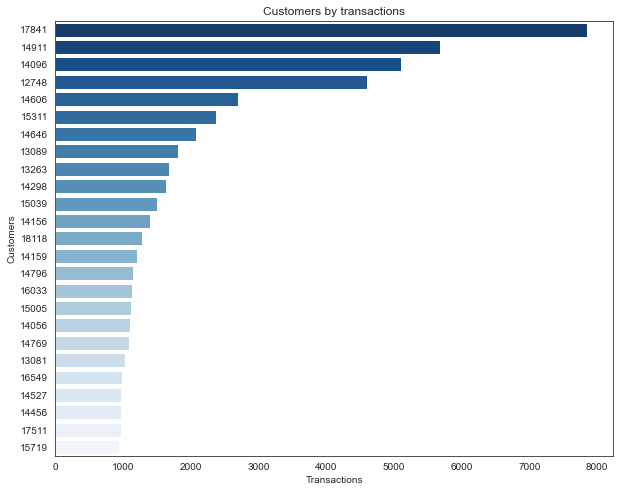

In [89]:
customer_transactions = df2_final.CustomerID.value_counts().sort_values(ascending=False).head(25)

fig, ax = plt.subplots(figsize = (10, 8))

sns.barplot(y = customer_transactions.index, x = customer_transactions.values, orient = "h", 
            ax = ax, order = customer_transactions.index, palette = "Blues_r")

plt.title("Customers by transactions")
plt.ylabel("Customers")
plt.xlabel("Transactions")

plt.show()

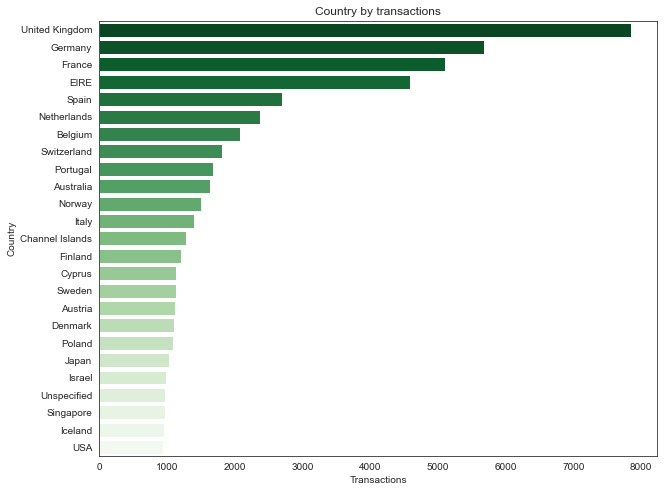

In [90]:
country_transactions = df2_final.Country.value_counts().sort_values(ascending=False).head(25)

fig, ax = plt.subplots(figsize = (10, 8))

sns.barplot(y = country_transactions.index, x = customer_transactions.values, orient = "h", 
            ax = ax, order = country_transactions.index, palette = "Greens_r")

plt.title("Country by transactions")
plt.ylabel("Country")
plt.xlabel("Transactions")

plt.show()

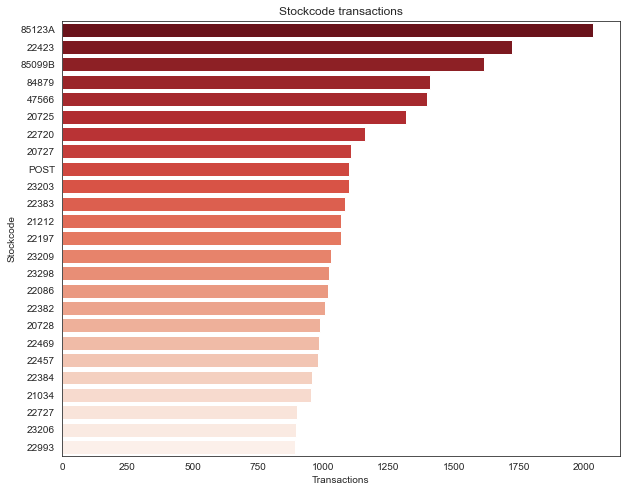

In [91]:
Stock_transactions = df2_final.StockCode.value_counts().sort_values(ascending=False).head(25)

fig, ax = plt.subplots(figsize = (10, 8))

sns.barplot(y = Stock_transactions.index, x = Stock_transactions.values, orient = "h", 
            ax = ax, order = Stock_transactions.index, palette = "Reds_r")

plt.title("Stockcode transactions")
plt.ylabel("Stockcode")
plt.xlabel("Transactions")

plt.show()

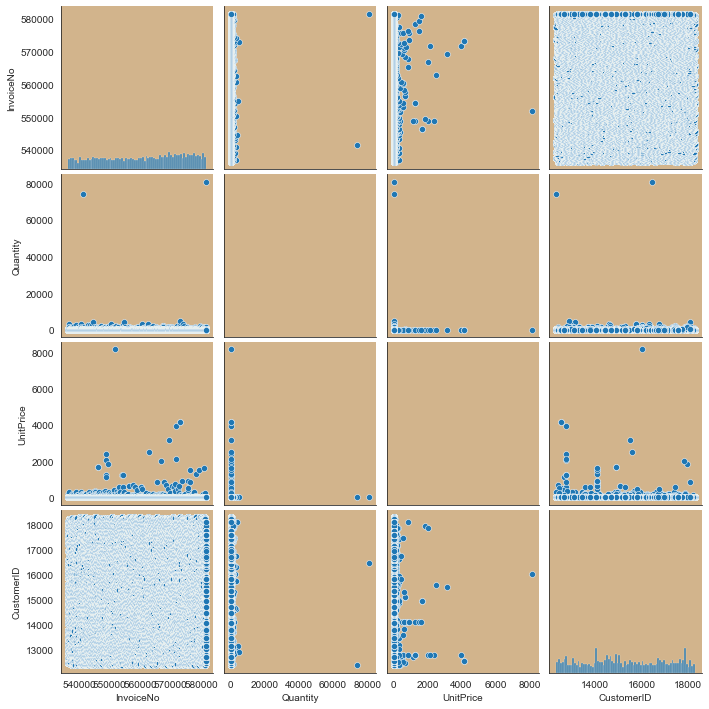

In [149]:
sns.pairplot(df2_final[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']])

#### If we look at the above graphs no co-relation.

#### Cohort Analysis
#### We can devide it into three types here.
#### Time based
#### Behaviour or buying habbits
#### Value or spend based.
#### Also geographically close to each other. ( by country)

In [94]:
df2_final.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  
5 2010-12-01 08:26:00       7.65       17850  United Kingdom  
6 2010-12-01 08:26:00       4.25       17850  United Kingdom  
7 2010-12-01 08:28:00       1.85       17850  United Kingdom  
8 2010-12-01 08:28:00       1.85       17850  United Kingdom  
9 2010-12-01 08:34:00       1.69       13047  United Kingdom

In [96]:
df2_final.loc[:,('spend')] = df2_final.Quantity * df2_final.UnitPrice

In [97]:
df2_final.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  spend  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34

In [99]:
df2_final.loc[:,('year')]  = pd.DatetimeIndex(df2_final.loc[:,('InvoiceDate')]).year
df2_final.loc[:,('month')] = pd.DatetimeIndex(df2_final.loc[:,('InvoiceDate')]).month
df2_final.loc[:,('day')]   = pd.DatetimeIndex(df2_final.loc[:,('InvoiceDate')]).day

In [100]:
df2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int64         
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   spend        397884 non-null  float64       
 9   year         397884 non-null  int64         
 10  month        397884 non-null  int64         
 11  day          397884 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 39.5+ MB


In [101]:
df2_final.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  spend  year  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  15.30  2010   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  22.00  2010   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   

   month  day  
0     12    1  
1     12    1  
2     12    1  
3     12    1  
4     12    1

In [102]:
min(df2_final.InvoiceDate)

Timestamp('2010-12-01 08:26:00')

In [103]:
max(df2_final.InvoiceDate)

Timestamp('2011-12-09 12:50:00')

In [104]:
#### So we have little more than a year data.

In [105]:
df2_final.to_csv('project1_dec312021.csv') # index=False) , encoding='utf-8')

In [108]:
#df2_final.loc[:,("InvoiceMonth")] = df2_final.loc[:,("InvoiceDate")].month #apply(get_month)
df2_final.loc[:,('InvoiceMonth')] = pd.DatetimeIndex(df2_final.loc[:,('InvoiceDate')]).month

df2_final.loc[:,("CohortMonth")] = df2_final.groupby("CustomerID")["InvoiceMonth"].transform("min")

In [109]:
df2_final.loc[:,("CohortInvDate")] = df2_final.groupby("CustomerID")["InvoiceDate"].transform("min")

In [110]:
pd.set_option('display.max_rows', 500)

In [111]:
df2_final.head(500)

InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5       536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6       536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7       536366     22633               HAND WARMER UNION JACK         6   
8       536366     22632            HAND WARMER RED POLKA DOT         6   
9       536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10      536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11      536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12      536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
13      536367     22310              IVORY KNITTED MUG COSY          6   
14      536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
15      536367     22623        BOX OF VINTAGE JIGSAW BLOCKS          3   
16      536367     22622       BOX OF VINTAGE ALPHABET BLOCKS         2   
17      536367     21754             HOME BUILDING BLOCK WORD         3   
18      536367     21755             LOVE BUILDING BLOCK WORD         3   
19      536367     21777          RECIPE BOX WITH METAL HEART         4   
20      536367     48187                  DOORMAT NEW ENGLAND         4   
21      536368     22960             JAM MAKING SET WITH JARS         6   
22      536368     22913          RED COAT RACK PARIS FASHION         3   
23      536368     22912       YELLOW COAT RACK PARIS FASHION         3   
24      536368     22914         BLUE COAT RACK PARIS FASHION         3   
25      536369     21756             BATH BUILDING BLOCK WORD         3   
26      536370     22728            ALARM CLOCK BAKELIKE PINK        24   
27      536370     22727            ALARM CLOCK BAKELIKE RED         24   
28      536370     22726           ALARM CLOCK BAKELIKE GREEN        12   
29      536370     21724      PANDA AND BUNNIES STICKER SHEET        12   
30      536370     21883                     STARS GIFT TAPE         24   
31      536370     10002          INFLATABLE POLITICAL GLOBE         48   
32      536370     21791   VINTAGE HEADS AND TAILS CARD GAME         24   
33      536370     21035      SET/2 RED RETROSPOT TEA TOWELS         18   
34      536370     22326  ROUND SNACK BOXES SET OF4 WOODLAND         24   
35      536370     22629                  SPACEBOY LUNCH BOX         24   
36      536370     22659              LUNCH BOX I LOVE LONDON        24   
37      536370     22631             CIRCUS PARADE LUNCH BOX         24   
38      536370     22661      CHARLOTTE BAG DOLLY GIRL DESIGN        20   
39      536370     21731        RED TOADSTOOL LED NIGHT LIGHT        24   
40      536370     22900      SET 2 TEA TOWELS I LOVE LONDON         24   
41      536370     21913       VINTAGE SEASIDE JIGSAW PUZZLES        12   
42      536370     22540           MINI JIGSAW CIRCUS PARADE         24   
43      536370     22544                 MINI JIGSAW SPACEBOY        24   
44      536370     22492              MINI PAINT SET VINTAGE         36   
45      536370      POST                              POSTAGE         3   
46      536371     22086      PAPER CHAIN KIT 50'S CHRISTMAS         80   
47      536372     22632            HAND WARMER RED POLKA DOT         6   
48      536372     22633               HAND WARMER UNION JACK         6   
49      536373    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
50      536373     71053                  WHITE METAL LANTERN         6   
51      536373    84406B       CREAM CUPID HEARTS COAT HANGER         8   
52      536373     20679      

In [112]:
df2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  int64         
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int64         
 7   Country        397884 non-null  object        
 8   spend          397884 non-null  float64       
 9   year           397884 non-null  int64         
 10  month          397884 non-null  int64         
 11  day            397884 non-null  int64         
 12  InvoiceMonth   397884 non-null  int64         
 13  CohortMonth    397884 non-null  int64         
 14  CohortInvDate  397884 non-null  datetime64[ns]
dtype

In [113]:
# (df2_final.InvoiceDate - df2_final.CohortInvDate)

In [115]:
# df2_final.loc[:,('cohortdate')]  = df2_final.loc[:,('InvoiceDate')].apply(lambda x : x.replace(day=1))
df2_final.loc[:,('cohortdate')] = df2_final.loc[:,('InvoiceDate')].to_numpy().astype('datetime64[M]')

In [117]:
df2_final.loc[:,('Cohortyear')]  = pd.DatetimeIndex(df2_final.loc[:,('CohortInvDate')]).year
df2_final.loc[:,('Cohortmonth')] = pd.DatetimeIndex(df2_final.loc[:,('CohortInvDate')]).month
df2_final.loc[:,('Cohortday')]   = 1 #pd.DatetimeIndex(df2_final.loc[:,('CohortInvDate')]).day

In [118]:
# df2_final.loc[:,('daydiff')] = (df2_final.InvoiceDate - df2_final.CohortInvDate) # .apply(np.int64)  + 1

In [119]:
df2_final.loc[:,('daydiff_1')] = 12*(df2_final.year - df2_final.Cohortyear) + (df2_final.month - df2_final.Cohortmonth) + 1

In [120]:
df2_final[(df2_final.daydiff_1 > 1)]

InvoiceNo StockCode                          Description  Quantity  \
42505      540001     21733     RED HANGING HEART T-LIGHT HOLDER        32   
42506      540001     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        24   
42507      540001     22060      LARGE CAKE STAND HANGING HEARTS         6   
42508      540001     22151            PLACE SETTING WHITE HEART        48   
42509      540001     22508             DOORSTOP RETROSPOT HEART        16   
...           ...       ...                                  ...       ...   
541904     581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906     581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  spend  \
42505  2011-01-04 10:22:00       2.55       18097  United Kingdom  81.60   
42506  2011-01-04 10:22:00       2.95       18097  United Kingdom  70.80   
42507  2011-01-04 10:22:00       9.95       18097  United Kingdom  59.70   
42508  2011-01-04 10:22:00       0.42       18097  United Kingdom  20.16   
42509  2011-01-04 10:22:00       3.39       18097  United Kingdom  54.24   
...                    ...        ...         ...             ...    ...   
541904 2011-12-09 12:50:00       0.85       12680          France  10.20   
541905 2011-12-09 12:50:00       2.10       12680          France  12.60   
541906 2011-12-09 12:50:00       4.15       12680          France  16.60   
541907 2011-12-09 12:50:00       4.15       12680          France  16.60   
541908 2011-12-09 12:50:00       4.95       12680          France  14.85   

        year  month  day  InvoiceMonth  CohortMonth       CohortInvDate  \
42505   2011      1    4             1            1 2010-12-20 14:49:00   
42506   2011      1    4             1            1 2010-12-20 14:49:00   
42507   2011      1    4             1            1 2010-12-20 14:49:00   
42508   2011      1    4             1            1 2010-12-20 14:49:00   
42509   2011      1    4             1            1 2010-12-20 14:49:00   
...      ...    ...  ...           ...          ...                 ...   
541904  2011     12    9            12            8 2011-08-18 15:44:00   
541905  2011     12    9            12            8 2011-08-18 15:44:00   
541906  2011     12    9            12            8 2011-08-18 15:44:00   
541907  2011     12    9            12            8 2011-08-18 15:44:00   
541908  2011     12    9            12            8 2011-08-18 15:44:00   

       cohortdate  Cohortyear  Cohortmonth  Cohortday  daydiff_1  
42505  2011-01-01        2010           12          1          2  
42506  2011-01-01        2010           12          1          2  
42507  2011-01-01        2010           12          1          2  
42508  2011-01-01        2010           12          1          2  
42509  2011-01-01        2010           12          1          2  
...           ...         ...          ...        ...        ...  
541904 2011-12-01        2011            8          1          5  
541905 2011-12-01        2011            8          1          5  
541906 2011-12-01        2011            8          1          5  
541907 2011-12-01        2011            8          1          5  
541908 2011-12-01        2011            8          1          5  

[279131 rows x 20 columns]

In [121]:
df2_final[((df2_final.daydiff_1 > 1) & (df2_final.CustomerID == 12680))]

InvoiceNo StockCode                       Description  Quantity  \
334493     566256     22730        ALARM CLOCK BAKELIKE IVORY         4   
334494     566256     22726        ALARM CLOCK BAKELIKE GREEN         4   
334495     566256     20682  RED RETROSPOT CHILDRENS UMBRELLA         6   
334496     566256     37495    FAIRY CAKE BIRTHDAY CANDLE SET         4   
334497     566256     21208       PASTEL COLOUR HONEYCOMB FAN        12   
334498     566256     20751  FUNKY WASHING UP GLOVES ASSORTED        12   
334499     566256      POST                           POSTAGE         1   
362780     568518     22555         PLASTERS IN TIN STRONGMAN        12   
362781     568518     22556    PLASTERS IN TIN CIRCUS PARADE         12   
362782     568518     22630              DOLLY GIRL LUNCH BOX        12   
362783     568518     22629               SPACEBOY LUNCH BOX         12   
362784     568518     22634    CHILDS BREAKFAST SET SPACEBOY          2   
362785     568518     22635  CHILDS BREAKFAST SET DOLLY GIRL          2   
362786     568518     22726        ALARM CLOCK BAKELIKE GREEN         4   
362787     568518     22728         ALARM CLOCK BAKELIKE PINK         4   
362788     568518     22727         ALARM CLOCK BAKELIKE RED          4   
362789     568518      POST                           POSTAGE         1   
541894     581587     22631          CIRCUS PARADE LUNCH BOX         12   
541895     581587     22556    PLASTERS IN TIN CIRCUS PARADE         12   
541896     581587     22555         PLASTERS IN TIN STRONGMAN        12   
541897     581587     22728         ALARM CLOCK BAKELIKE PINK         4   
541898     581587     22727         ALARM CLOCK BAKELIKE RED          4   
541899     581587     22726        ALARM CLOCK BAKELIKE GREEN         4   
541900     581587     22730        ALARM CLOCK BAKELIKE IVORY         4   
541901     581587     22367   CHILDRENS APRON SPACEBOY DESIGN         8   
541902     581587     22629               SPACEBOY LUNCH BOX         12   
541903     581587     23256       CHILDRENS CUTLERY SPACEBOY          4   
541904     581587     22613       PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587     22899      CHILDREN'S APRON DOLLY GIRL          6   
541906     581587     23254     CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587     23255   CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587     22138     BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  spend  year  month  \
334493 2011-09-11 12:27:00       3.75       12680  France  15.00  2011      9   
334494 2011-09-11 12:27:00       3.75       12680  France  15.00  2011      9   
334495 2011-09-11 12:27:00       3.25       12680  France  19.50  2011      9   
334496 2011-09-11 12:27:00       3.75       12680  France  15.00  2011      9   
334497 2011-09-11 12:27:00       0.39       12680  France   4.68  2011      9   
334498 2011-09-11 12:27:00       2.10       12680  France  25.20  2011      9   
334499 2011-09-11 12:27:00      18.00       12680  France  18.00  2011      9   
362780 2011-09-27 12:53:00       1.65       12680  France  19.80  2011      9   
362781 2011-09-27 12:53:00       1.65       12680  France  19.80  2011      9   
362782 2011-09-27 12:53:00       1.95       12680  France  23.40  2011      9   
362783 2011-09-27 12:53:00       1.95       12680  France  23.40  2011      9   
362784 2011-09-27 12:53:00       9.95       12680  France  19.90  2011      9   
362785 2011-09-27 12:53:00       9.95       12680  France  19.90  2011      9   
362786 2011-09-27 12:53:00       3.75       12680  France  15.00  2011      9   
362787 2011-09-27 12:53:00       3.75       12680  France  15.00  2011      9   
362788 2011-09-27 12:53:00       3.75       12680  France  15.00  2011      9   
362789 2011-09-27 12:53:00      18.00       12680  France  18.00  2011      9   
541894 2011-12-09 12:50:00       1.95       12680  France  23.40  2011    

In [122]:
df2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  int64         
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int64         
 7   Country        397884 non-null  object        
 8   spend          397884 non-null  float64       
 9   year           397884 non-null  int64         
 10  month          397884 non-null  int64         
 11  day            397884 non-null  int64         
 12  InvoiceMonth   397884 non-null  int64         
 13  CohortMonth    397884 non-null  int64         
 14  CohortInvDate  397884 non-null  datetime64[ns]
 15  

In [123]:
df2_final.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  spend  year  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  15.30  2010   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  22.00  2010   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   
5 2010-12-01 08:26:00       7.65       17850  United Kingdom  15.30  2010   
6 2010-12-01 08:26:00       4.25       17850  United Kingdom  25.50  2010   
7 2010-12-01 08:28:00       1.85       17850  United Kingdom  11.10  2010   
8 2010-12-01 08:28:00       1.85       17850  United Kingdom  11.10  2010   
9 2010-12-01 08:34:00       1.69       13047  United Kingdom  54.08  2010   

   month  day  InvoiceMonth  CohortMonth       CohortInvDate cohortdate  \
0     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
1     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
2     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
3     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
4     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
5     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
6     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
7     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
8     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
9     12    1            12            2 2010-12-01 08:34:00 2010-12-01   

   Cohortyear  Cohortmonth  Cohortday  daydiff_1  
0        2010           12          1          1  
1        2010           12          1          1  
2        2010           12          1          1  
3        2010           12          1          1  
4        2010           12          1          1  
5        2010           12          1          1  
6        2010           12          1          1  
7        2010           12          1          1  
8        2010           12          1          1  
9        2010           12          1          1

In [124]:
df2_final.daydiff_1.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [125]:
cohort_bytime = df2_final.groupby(["daydiff_1", "cohortdate"])["CustomerID"].nunique().reset_index()
cohort_pivot = cohort_bytime.pivot(index = "cohortdate", columns = "daydiff_1", values = "CustomerID")

cohort_pivot

daydiff_1      1      2      3      4      5      6      7      8      9   \
cohortdate                                                                  
2010-12-01  885.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-01-01  417.0  324.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-02-01  380.0   92.0  286.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-03-01  452.0   71.0  111.0  340.0    NaN    NaN    NaN    NaN    NaN   
2011-04-01  300.0   68.0   71.0   96.0  321.0    NaN    NaN    NaN    NaN   
2011-05-01  284.0   64.0  114.0  108.0  134.0  352.0    NaN    NaN    NaN   
2011-06-01  242.0   54.0   61.0   90.0  103.0  120.0  321.0    NaN    NaN   
2011-07-01  188.0   42.0   49.0   63.0  101.0   94.0  103.0  309.0    NaN   
2011-08-01  169.0   34.0   38.0   49.0   59.0   76.0   96.0  101.0  313.0   
2011-09-01  299.0   35.0   39.0   64.0   59.0   68.0  121.0  106.0  125.0   
2011-10-01  358.0   70.0   42.0   42.0   56.0   66.0   65.0  104.0   94.0   
2011-11-01  323.0   86.0   90.0   41.0   51.0   81.0   75.0   78.0  126.0   
2011-12-01   41.0   36.0   41.0   34.0   21.0   21.0   23.0   27.0   22.0   

daydiff_1      10     11     12     13  
cohortdate                              
2010-12-01    NaN    NaN    NaN    NaN  
2011-01-01    NaN    NaN    NaN    NaN  
2011-02-01    NaN    NaN    NaN    NaN  
2011-03-01    NaN    NaN    NaN    NaN  
2011-04-01    NaN    NaN    NaN    NaN  
2011-05-01    NaN    NaN    NaN    NaN  
2011-06-01    NaN    NaN    NaN    NaN  
2011-07-01    NaN    NaN    NaN    NaN  
2011-08-01    NaN    NaN    NaN    NaN  
2011-09-01  350.0    NaN    NaN    NaN  
2011-10-01  136.0  331.0    NaN    NaN  
2011-11-01  116.0  152.0  445.0    NaN  
2011-12-01   39.0   26.0   49.0  235.0

#### Above data is our cohort table. Its interpretation is simple.

#### For example, We have 417 unique customer with their first transaction is in 2011-01. 

#### Its cohort month is 2011-01 and cohort index is 1. Go on the one right cell, it is 324. Its mean, 324 unique customer retain their customership for next month.

#### User Retention Rate = (# of users across period/Total # active users in the previous period)*100

#### (Total MRR from renewing customers) / (Total MRR from customers of the previous period) x 100 = Monthly Recurring Revenue Retention [expressed as percentage]


#### While MRR retention rate might be the one that gives you the best idea of your company’s short- to medium-term health, you shouldn’t give it total priority over user or customer churn rates. The various types of retention rate actually perform an important job when used together.

#### For instance, it’s important to assess both MRR and user retention in relation to one another. You may have a low user/customer churn and see this as reason enough to be happy with things as they are. However, the small number of customers/users you’ve churned may be from the most valuable segment(s) of all, providing the most MRR. Even a small loss from this pool of customers would therefore represent a sharp loss in revenue.

#### Likewise, if you’re simply relying on customer churn to measure satisfaction with your product, you’ll be missing out on users who’ve churned but who’ve not yet canceled their subscription. By comparing user and customer retention rates to this end, you can pinpoint at-risk customers more easily and return them to the fold.

In [129]:
cohort_sizes = cohort_pivot.iloc[:, 0]

retention = cohort_pivot.divide(cohort_sizes, axis = 0)
retention.index = retention.index.strftime("%Y-%m")

retention

daydiff_1    1         2         3         4         5         6         7   \
cohortdate                                                                    
2010-12     1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2011-01     1.0  0.776978       NaN       NaN       NaN       NaN       NaN   
2011-02     1.0  0.242105  0.752632       NaN       NaN       NaN       NaN   
2011-03     1.0  0.157080  0.245575  0.752212       NaN       NaN       NaN   
2011-04     1.0  0.226667  0.236667  0.320000  1.070000       NaN       NaN   
2011-05     1.0  0.225352  0.401408  0.380282  0.471831  1.239437       NaN   
2011-06     1.0  0.223140  0.252066  0.371901  0.425620  0.495868  1.326446   
2011-07     1.0  0.223404  0.260638  0.335106  0.537234  0.500000  0.547872   
2011-08     1.0  0.201183  0.224852  0.289941  0.349112  0.449704  0.568047   
2011-09     1.0  0.117057  0.130435  0.214047  0.197324  0.227425  0.404682   
2011-10     1.0  0.195531  0.117318  0.117318  0.156425  0.184358  0.181564   
2011-11     1.0  0.266254  0.278638  0.126935  0.157895  0.250774  0.232198   
2011-12     1.0  0.878049  1.000000  0.829268  0.512195  0.512195  0.560976   

daydiff_1         8         9         10        11        12        13  
cohortdate                                                              
2010-12          NaN       NaN       NaN       NaN       NaN       NaN  
2011-01          NaN       NaN       NaN       NaN       NaN       NaN  
2011-02          NaN       NaN       NaN       NaN       NaN       NaN  
2011-03          NaN       NaN       NaN       NaN       NaN       NaN  
2011-04          NaN       NaN       NaN       NaN       NaN       NaN  
2011-05          NaN       NaN       NaN       NaN       NaN       NaN  
2011-06          NaN       NaN       NaN       NaN       NaN       NaN  
2011-07     1.643617       NaN       NaN       NaN       NaN       NaN  
2011-08     0.597633  1.852071       NaN       NaN       NaN       NaN  
2011-09     0.354515  0.418060  1.170569       NaN       NaN       NaN  
2011-10     0.290503  0.262570  0.379888  0.924581       NaN       NaN  
2011-11     0.241486  0.390093  0.359133  0.470588  1.377709       NaN  
2011-12     0.658537  0.536585  0.951220  0.634146  1.195122  5.731707

#### Learnt from https://amplitude.com/blog/how-to-calculate-retention-rate-b2b-saas

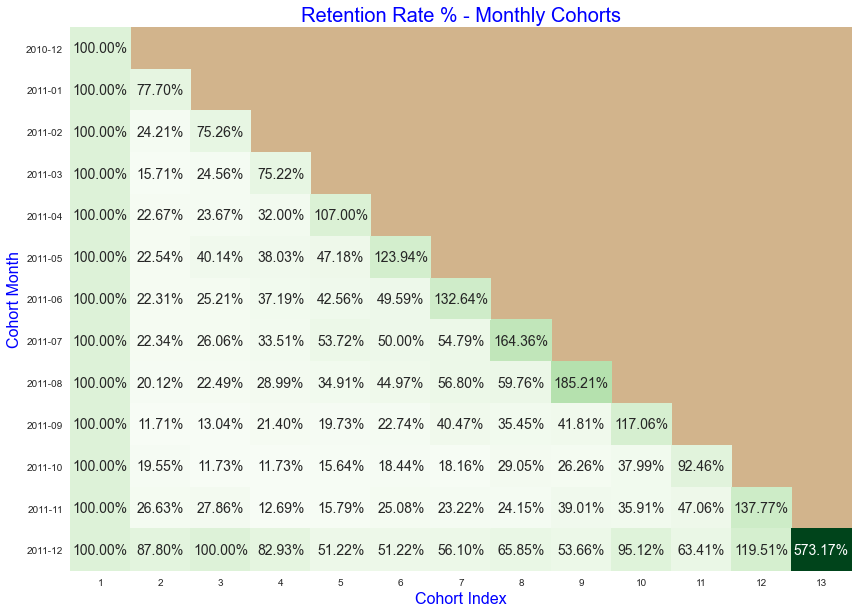

In [130]:
plt.rcParams["axes.facecolor"] = "Tan"
fig, ax = plt.subplots(figsize = (14, 10))

sns.heatmap(retention, cmap = "Greens", annot = True, fmt = ".2%", annot_kws = {"fontsize": 14}, cbar = False, ax = ax)

plt.title("Retention Rate % - Monthly Cohorts",color = 'Blue', fontsize=20)
ax.set_xlabel("Cohort Index", color = 'Blue' , fontsize=16)
ax.set_ylabel("Cohort Month", color = 'Blue' , fontsize=16)
plt.yticks(rotation = 0)
plt.show()

In [131]:
cohort_bytime = df2_final.groupby(["daydiff_1", "Cohortyear"])["CustomerID"].nunique().reset_index()
cohort_pivot = cohort_bytime.pivot(index = "Cohortyear", columns = "daydiff_1", values = "CustomerID")

cohort_pivot

daydiff_1       1      2      3      4      5      6      7      8      9   \
Cohortyear                                                                   
2010         885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0  313.0   
2011        3453.0  652.0  656.0  587.0  584.0  526.0  483.0  416.0  367.0   

daydiff_1      10     11     12     13  
Cohortyear                              
2010        350.0  331.0  445.0  235.0  
2011        291.0  178.0   49.0    NaN

In [132]:
cohort_byspend = df2_final.groupby(["spend", "cohortdate"])["CustomerID"].nunique().reset_index()
#cohort_byspend = df2_final.groupby(["month"]).agg({"TotalPrice": "sum","CustomerID": "nunique"})
cohort_pivot = cohort_byspend.pivot(index = "cohortdate", columns = "spend", values = "CustomerID")

cohort_pivot

spend       0.001       0.060       0.080       0.100       0.120       \
cohortdate                                                               
2010-12-01         NaN         NaN         NaN         NaN         NaN   
2011-01-01         NaN         NaN         NaN         NaN         NaN   
2011-02-01         NaN         NaN         NaN         NaN         NaN   
2011-03-01         NaN         NaN         NaN         NaN         NaN   
2011-04-01         1.0         NaN         NaN         NaN         3.0   
2011-05-01         NaN         NaN         NaN         NaN         NaN   
2011-06-01         NaN         NaN         NaN         1.0         NaN   
2011-07-01         1.0         NaN         1.0         1.0         3.0   
2011-08-01         NaN         NaN         NaN         NaN         1.0   
2011-09-01         2.0         NaN         NaN         NaN         2.0   
2011-10-01         NaN         NaN         NaN         NaN         5.0   
2011-11-01         NaN         1.0         NaN         1.0         5.0   
2011-12-01         NaN         NaN         NaN         NaN         3.0   

spend       0.140       0.160       0.180       0.190       0.210       ...  \
cohortdate                                                              ...   
2010-12-01         2.0         NaN         1.0         NaN         4.0  ...   
2011-01-01         NaN         NaN         NaN         1.0         1.0  ...   
2011-02-01         NaN         NaN         1.0         1.0         3.0  ...   
2011-03-01         NaN         NaN         NaN         1.0         3.0  ...   
2011-04-01         NaN         NaN         NaN         1.0         2.0  ...   
2011-05-01         NaN         NaN         NaN         1.0         2.0  ...   
2011-06-01         NaN         NaN         NaN         5.0         1.0  ...   
2011-07-01         1.0         NaN         NaN         9.0         2.0  ...   
2011-08-01         NaN         NaN         NaN         3.0         1.0  ...   
2011-09-01         NaN         NaN         NaN         4.0         4.0  ...   
2011-10-01         NaN         NaN         NaN        13.0         8.0  ...   
2011-11-01         1.0         1.0         NaN        19.0        16.0  ...   
2011-12-01         NaN         NaN         NaN         8.0        16.0  ...   

spend       4522.500    4632.000    4921.500    4992.000    6539.400    \
cohortdate                                                               
2010-12-01         NaN         NaN         NaN         NaN         NaN   
2011-01-01         1.0         NaN         1.0         NaN         1.0   
2011-02-01         NaN         NaN         NaN         NaN         NaN   
2011-03-01         NaN         NaN         NaN         NaN         NaN   
2011-04-01         NaN         1.0         NaN         NaN         1.0   
2011-05-01         NaN         NaN         NaN         NaN         NaN   
2011-06-01         NaN         NaN         NaN         NaN         NaN   
2011-07-01         NaN         NaN         NaN         NaN         NaN   
2011-08-01         NaN         NaN         NaN         NaN         NaN   
2011-09-01         NaN         NaN         NaN         NaN         NaN   
2011-10-01         NaN         NaN         NaN         1.0         NaN   
2011-11-01         NaN         NaN         NaN         NaN         NaN   
2011-12-01         NaN         NaN         NaN         NaN         NaN   

spend       7144.720    8142.750    38970.000   77183.600   168469.600  
cohortdate                                                              
2010-12-01         NaN         NaN         NaN         NaN         NaN  
2011-01-01         NaN         NaN         NaN         1.0         NaN  
2011-02-01         NaN         NaN         NaN         NaN         NaN  
2011-03-01         NaN         NaN         NaN         NaN         NaN  
2011-04-01         NaN         NaN         NaN         NaN         NaN  
2011-05-01         NaN         1.0         NaN         NaN         NaN  
2011-06-

# RFM Analysis 

In [154]:
import datetime as dt

In [155]:
a = dt.timedelta(days = 1)

In [156]:
print(a)

1 day, 0:00:00


#### We are taking the entire data, which is little more than a year ( The project description said take 3 , 6 months or a year)

In [157]:
last_day = df2_final.InvoiceDate.max() + dt.timedelta(days = 1)

In [288]:
df_rfm = df2_final.groupby("CustomerID").agg({"InvoiceDate": lambda x: (last_day - x.max()).days,
                                          "InvoiceNo": "nunique",
                                          "spend": "sum"})

df_rfm.rename(columns = {"InvoiceDate": "Recency",
                         "InvoiceNo": "Frequency",
                         "spend": "Monetary"}, inplace = True)

df_rfm.head()

Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2          7   4310.00
12348            75          4   1797.24
12349            19          1   1757.55
12350           310          1    334.40

In [289]:
df_rfm.head(100)

Recency  Frequency   Monetary
CustomerID                               
12346           326          1   77183.60
12347             2          7    4310.00
12348            75          4    1797.24
12349            19          1    1757.55
12350           310          1     334.40
12352            36          8    2506.04
12353           204          1      89.00
12354           232          1    1079.40
12355           214          1     459.40
12356            23          3    2811.43
12357            33          1    6207.67
12358             2          2    1168.06
12359            58          4    6372.58
12360            52          3    2662.06
12361           287          1     189.90
12362             3         10    5226.23
12363           110          2     552.00
12364             8          4    1313.10
12365           291          2     641.38
12367             4          1     168.90
12370            51          4    3545.69
12371            45          2    1887.96
12372            72          3    1298.04
12373           311          1     364.60
12374            25          1     742.93
12375            11          2     457.50
12377           315          2    1628.12
12378           130          1    4008.62
12379            82          2     852.24
12380            22          4    2724.81
12381             5          5    1845.31
12383           185          5    1850.56
12384            29          2     585.27
12386           338          2     401.90
12388            16          6    2780.66
12390            80          1     549.84
12391            22          1     460.89
12393            72          4    1582.60
12394            64          2    1272.48
12395            19         12    3018.63
12397            36          2    2409.90
12398            46          1    1635.66
12399           119          4    1108.65
12401           303          1      84.30
12402           323          1     225.60
12403            50          1     427.70
12405           149          1    1710.39
12406            22          2    3415.30
12407            50          5    1708.12
12408            33          5    2888.55
12409            79          3   11072.67
12410           309          2     693.33
12412            75          3    1226.88
12413            67          3     758.10
12414           217          3     562.41
12415            24         21  124914.53
12417             3          9    3649.10
12418           113          1     668.58
12420            64          1     600.39
12421            16          4     807.04
12422            96          3     803.56
12423             1          8    1859.31
12424           163          2    1760.96
12425            78          1     777.20
12426           195          1     582.73
12427            22          3     825.80
12428            26          9    7956.46
12429             9          4    3750.40
12430            43          1     256.40
12431            36         15    6487.45
12432            43          5    5059.32
12433             1          7   13375.87
12434            85          2     806.14
12435            80          2    7829.89
12436           100          1     509.01
12437             2         18    4951.41
12438            14          2    2906.85
12441           367          1     173.55
12442             3          1     172.06
12444            21          5    5005.46
12445            22          1     133.40
12446            58          1    1002.31
12447           243          1     476.49
12448            44          1     449.45
12449            22          4    4067.29
12450           156          2     197.88
12451            11          5    9035.52
12452            17          2     430.57
12453           134          1     707.09
12454            56          1    3528.34
12455            73          6    2466.86
12456            44          3    3181.04
12457            66          7    2363.23
12458            71   

In [290]:
label_s = range(3, 0, -1)
fre_lab = range(0, 4)

In [291]:
df_rfm["R"] = pd.qcut(df_rfm["Recency"], 3, labels = label_s)
df_rfm["F"] = pd.qcut(df_rfm["Frequency"].rank(method = 'first'), 4, labels = fre_lab)
df_rfm["M"] = pd.qcut(df_rfm["Monetary"], 4, labels = fre_lab)

In [292]:
df_rfm["Recency"].max()

374

In [293]:
df_rfm["Frequency"].max()

209

In [294]:
df_rfm["Monetary"].max()

280206.01999999984

In [295]:
df_rfm["M"].max()

3

In [296]:
df_rfm["R"].max()

1

In [297]:
df_rfm["F"].max()

3

In [298]:
df_rfm.head(100)

Recency  Frequency   Monetary  R  F  M
CustomerID                                        
12346           326          1   77183.60  1  0  3
12347             2          7    4310.00  3  3  3
12348            75          4    1797.24  2  2  3
12349            19          1    1757.55  3  0  3
12350           310          1     334.40  1  0  1
12352            36          8    2506.04  2  3  3
12353           204          1      89.00  1  0  0
12354           232          1    1079.40  1  0  2
12355           214          1     459.40  1  0  1
12356            23          3    2811.43  3  2  3
12357            33          1    6207.67  2  0  3
12358             2          2    1168.06  3  1  2
12359            58          4    6372.58  2  2  3
12360            52          3    2662.06  2  2  3
12361           287          1     189.90  1  0  0
12362             3         10    5226.23  3  3  3
12363           110          2     552.00  1  1  1
12364             8          4    1313.10  3  2  2
12365           291          2     641.38  1  1  1
12367             4          1     168.90  3  0  0
12370            51          4    3545.69  2  2  3
12371            45          2    1887.96  2  1  3
12372            72          3    1298.04  2  2  2
12373           311          1     364.60  1  0  1
12374            25          1     742.93  3  0  2
12375            11          2     457.50  3  1  1
12377           315          2    1628.12  1  1  2
12378           130          1    4008.62  1  0  3
12379            82          2     852.24  2  1  2
12380            22          4    2724.81  3  2  3
12381             5          5    1845.31  3  2  3
12383           185          5    1850.56  1  2  3
12384            29          2     585.27  2  1  1
12386           338          2     401.90  1  1  1
12388            16          6    2780.66  3  3  3
12390            80          1     549.84  2  0  1
12391            22          1     460.89  3  0  1
12393            72          4    1582.60  2  2  2
12394            64          2    1272.48  2  1  2
12395            19         12    3018.63  3  3  3
12397            36          2    2409.90  2  1  3
12398            46          1    1635.66  2  0  2
12399           119          4    1108.65  1  2  2
12401           303          1      84.30  1  0  0
12402           323          1     225.60  1  0  0
12403            50          1     427.70  2  0  1
12405           149          1    1710.39  1  0  3
12406            22          2    3415.30  3  1  3
12407            50          5    1708.12  2  2  3
12408            33          5    2888.55  2  2  3
12409            79          3   11072.67  2  2  3
12410           309          2     693.33  1  1  2
12412            75          3    1226.88  2  2  2
12413            67          3     758.10  2  2  2
12414           217          3     562.41  1  2  1
12415            24         21  124914.53  3  3  3
12417             3          9    3649.10  3  3  3
12418           113          1     668.58  1  0  1
12420            64          1     600.39  2  0  1
12421            16          4     807.04  3  2  2
12422            96          3     803.56  1  2  2
12423             1          8    1859.31  3  3  3
12424           163          2    1760.96  1  1  3
12425            78          1     777.20  2  0  2
12426           195          1     582.73  1  0  1
12427            22          3     825.80  3  2  2
12428            26          9    7956.46  2  3  3
12429             9          4    3750.40  3  2  3
12430            43          1     256.40  2  0  0
12431            36         15    6487.45  2  3  3
12432            43          5    5059.32  2  2  3
12433             1          7   13375.87  3  3  3
12434            85          2     806.14  2  1  2
12435            80          2    7829.89  2  1  3
12436           100          1     509.01  1  0  1
12437             2         18    4951.41  3  3  3
12438            14          2    

In [299]:
df_rfm[df_rfm.M ==4]

Empty DataFrame
Columns: [Recency, Frequency, Monetary, R, F, M]
Index: []

In [300]:
df_rfm[df_rfm.M ==3]

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346           326          1  77183.60  1  0  3
12347             2          7   4310.00  3  3  3
12348            75          4   1797.24  2  2  3
12349            19          1   1757.55  3  0  3
12352            36          8   2506.04  2  3  3
...             ...        ...       ... .. .. ..
18259            25          3   2338.60  3  2  3
18260           173          6   2643.20  1  3  3
18272             3          6   3078.58  3  3  3
18283             4         16   2094.88  3  3  3
18287            43          3   1837.28  2  2  3

[1085 rows x 6 columns]

In [301]:
df_rfm[df_rfm.F ==4]

Empty DataFrame
Columns: [Recency, Frequency, Monetary, R, F, M]
Index: []

In [302]:
df_rfm[df_rfm.F ==3]

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12347             2          7   4310.00  3  3  3
12352            36          8   2506.04  2  3  3
12362             3         10   5226.23  3  3  3
12388            16          6   2780.66  3  3  3
12395            19         12   3018.63  3  3  3
...             ...        ...       ... .. .. ..
18245             7          7   2567.06  3  3  3
18257            39          8   2337.63  2  3  3
18260           173          6   2643.20  1  3  3
18272             3          6   3078.58  3  3  3
18283             4         16   2094.88  3  3  3

[1085 rows x 6 columns]

In [303]:
df_rfm[df_rfm.F ==1]

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12358             2          2   1168.06  3  1  2
12363           110          2    552.00  1  1  1
12365           291          2    641.38  1  1  1
12371            45          2   1887.96  2  1  3
12375            11          2    457.50  3  1  1
...             ...        ...       ... .. .. ..
18276            44          1    335.86  2  1  1
18277            58          1    110.38  2  1  0
18278            74          1    173.90  2  1  0
18280           278          1    180.60  1  1  0
18281           181          1     80.82  1  1  0

[1084 rows x 6 columns]

In [304]:
df_rfm[df_rfm.R ==3]

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12347             2          7   4310.00  3  3  3
12349            19          1   1757.55  3  0  3
12356            23          3   2811.43  3  2  3
12358             2          2   1168.06  3  1  2
12362             3         10   5226.23  3  3  3
...             ...        ...       ... .. .. ..
18259            25          3   2338.60  3  2  3
18272             3          6   3078.58  3  3  3
18273             2          3    204.00  3  2  0
18282             8          2    178.05  3  2  0
18283             4         16   2094.88  3  3  3

[1464 rows x 6 columns]

In [305]:
df_rfm["RFM_Segment"] = df_rfm["R"].astype(str) + df_rfm["F"].astype(str) + df_rfm["M"].astype(str)
df_rfm["RFM_Score"] = df_rfm[["R", "F", "M"]].sum(axis = 1)

In [306]:
df_rfm.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
CustomerID                                                              
12346           326          1  77183.60  1  0  3         103          4
12347             2          7   4310.00  3  3  3         333          9
12348            75          4   1797.24  2  2  3         223          7
12349            19          1   1757.55  3  0  3         303          6
12350           310          1    334.40  1  0  1         101          2
12352            36          8   2506.04  2  3  3         233          8
12353           204          1     89.00  1  0  0         100          1
12354           232          1   1079.40  1  0  2         102          3
12355           214          1    459.40  1  0  1         101          2
12356            23          3   2811.43  3  2  3         323          8

In [307]:
df_rfm["RFM_Score"].max()

9

In [308]:
df_rfm["RFM_Score"].min()

1

#### We can either use the RFM_Segment or RFM_Score to categorize the customers.

#### Let's try the score.

In [309]:
def label_custype (row):
   if row['RFM_Score']   >  7  :
      return 'Top Guns'
   elif row['RFM_Score'] >  5  :
      return 'Loyal Customers'
   elif row['RFM_Score'] >  3  :
      return 'Promising'
   elif row['RFM_Score'] >  2 :
      return 'Pay attention'
   return 'Churn'

In [310]:
df_rfm.apply (lambda row: label_custype(row), axis=1)

CustomerID
12346          Promising
12347           Top Guns
12348    Loyal Customers
12349    Loyal Customers
12350              Churn
              ...       
18280              Churn
18281              Churn
18282          Promising
18283           Top Guns
18287    Loyal Customers
Length: 4338, dtype: object

In [311]:
df_rfm['customer_type'] = df_rfm.apply (lambda row: label_race(row), axis=1)

In [312]:
df_rfm.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
CustomerID                                                                 
12346           326          1  77183.60  1  0  3         103          4   
12347             2          7   4310.00  3  3  3         333          9   
12348            75          4   1797.24  2  2  3         223          7   
12349            19          1   1757.55  3  0  3         303          6   
12350           310          1    334.40  1  0  1         101          2   
12352            36          8   2506.04  2  3  3         233          8   
12353           204          1     89.00  1  0  0         100          1   
12354           232          1   1079.40  1  0  2         102          3   
12355           214          1    459.40  1  0  1         101          2   
12356            23          3   2811.43  3  2  3         323          8   

              customer_type  
CustomerID                   
12346             Promising  
12347              Top Guns  
12348       Loyal Customers  
12349       Loyal Customers  
12350                 Churn  
12352              Top Guns  
12353                 Churn  
12354         Pay attention  
12355                 Churn  
12356              Top Guns

In [313]:
df_rfm1 = df_rfm.reset_index()

rfm_spend_size = df_rfm1.groupby("customer_type").agg({"Monetary": "mean",
                                                       "CustomerID": "nunique"})

rfm_spend_size.rename(columns = {"Monetary": "MeanMonetary", "CustomerID": "CustomerCount"}, inplace = True)
rfm_spend_size = rfm_spend_size.sort_values("MeanMonetary", ascending = False)

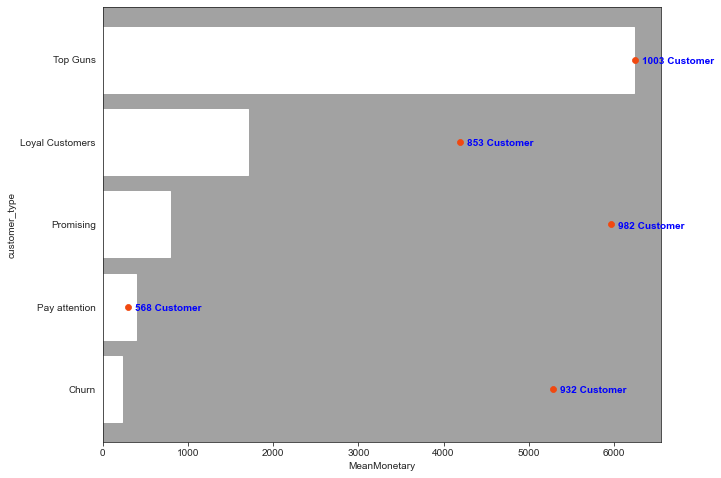

In [314]:
plt.rcParams["axes.facecolor"] = "#A2A2A2"
plt.rcParams["axes.grid"] = False

fig, ax = plt.subplots(figsize = (10, 8), facecolor = "White") # #A2A2A2 #101820

sns.barplot(x = rfm_spend_size.MeanMonetary, y = rfm_spend_size.index, ax = ax, color = "White")
ax2 = ax.twiny()
sns.lineplot(x = rfm_spend_size.CustomerCount, y = rfm_spend_size.index, ax = ax2, marker = "o", linewidth = 0,
             color = "#F1480F", markeredgecolor = "#F1480F")

ax2.axis("off")

for y, x in list(enumerate(rfm_spend_size.CustomerCount)):
    ax2.text(x + 6 , y + 0.05, str(x) + " Customer", color = "Blue", fontweight = "bold")

#### We can try Pereto analysis to see if20% get 80% revenue.

In [316]:
### Please write notes on RFM

# K Means Clustering

In [318]:
df_rfm.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
CustomerID                                                                 
12346           326          1  77183.60  1  0  3         103          4   
12347             2          7   4310.00  3  3  3         333          9   
12348            75          4   1797.24  2  2  3         223          7   
12349            19          1   1757.55  3  0  3         303          6   
12350           310          1    334.40  1  0  1         101          2   

              customer_type  
CustomerID                   
12346             Promising  
12347              Top Guns  
12348       Loyal Customers  
12349       Loyal Customers  
12350                 Churn

In [319]:
df_rfm1 = df_rfm.copy()

In [320]:
df_rfm1.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
CustomerID                                                                 
12346           326          1  77183.60  1  0  3         103          4   
12347             2          7   4310.00  3  3  3         333          9   
12348            75          4   1797.24  2  2  3         223          7   
12349            19          1   1757.55  3  0  3         303          6   
12350           310          1    334.40  1  0  1         101          2   

              customer_type  
CustomerID                   
12346             Promising  
12347              Top Guns  
12348       Loyal Customers  
12349       Loyal Customers  
12350                 Churn

In [ ]:
##### Total spend by top guns compared to the rest

In [480]:
df_rfm1[(df_rfm1.customer_type == 'Top Guns')].Monetary.sum()

6254680.349999999

In [481]:
df_rfm1.Monetary.sum()

8911407.904

In [486]:
#### % of Top Guns spend 
a = df_rfm1[(df_rfm1.customer_type == 'Top Guns')].Monetary.sum()
b = df_rfm1.Monetary.sum()

print("Top Guns Spend % is : ", (a/b)*100)

Top Guns Spend % is :  70.18734208308999


In [351]:
df_rfm2 = df_rfm1.drop(['customer_type'], axis=1)

In [352]:
df_rfm2.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
CustomerID                                                              
12346           326          1  77183.60  1  0  3         103          4
12347             2          7   4310.00  3  3  3         333          9
12348            75          4   1797.24  2  2  3         223          7
12349            19          1   1757.55  3  0  3         303          6
12350           310          1    334.40  1  0  1         101          2

In [353]:
df_rfm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Recency      4338 non-null   int64   
 1   Frequency    4338 non-null   int64   
 2   Monetary     4338 non-null   float64 
 3   R            4338 non-null   category
 4   F            4338 non-null   category
 5   M            4338 non-null   category
 6   RFM_Segment  4338 non-null   object  
 7   RFM_Score    4338 non-null   int64   
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 216.4+ KB


<AxesSubplot:xlabel='Recency'>

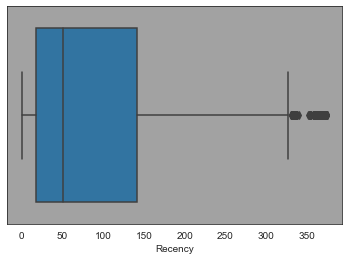

In [354]:
sns.boxplot(x=df_rfm2['Recency'])  

<AxesSubplot:xlabel='Frequency'>

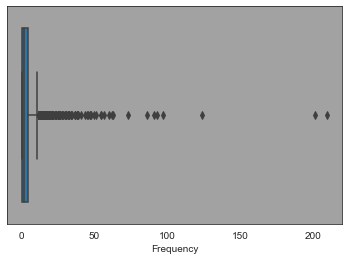

In [355]:
sns.boxplot(x=df_rfm2['Frequency'])  

<AxesSubplot:xlabel='Monetary'>

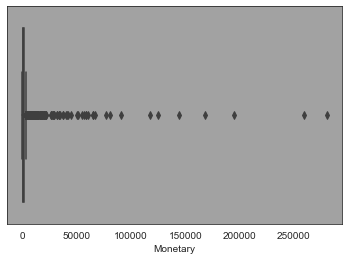

In [356]:
sns.boxplot(x=df_rfm2['Monetary'])  

#### These colums are having outliers. Eventhough R,F,M are categorical data , we did rate 3 being top for all columns,
#### so if we convert them to numerical, the algorithm will consider 3 higher than 2 then 1 etc. This is fine for our 
#### analysis as we want it that way only not categorical, get dummies etc.

In [361]:
#df_rfm2.loc[:,('R')] = df_rfm2.loc[:,'R'].apply(np.int64)
df_rfm2.iloc[:, 3 ] = df_rfm2.iloc[:, 3 ].astype('int')
df_rfm2.iloc[:, 4 ] = df_rfm2.iloc[:, 4 ].astype('int')
df_rfm2.iloc[:, 5 ] = df_rfm2.iloc[:, 5 ].astype('int')

In [362]:
df_rfm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      4338 non-null   int64  
 1   Frequency    4338 non-null   int64  
 2   Monetary     4338 non-null   float64
 3   R            4338 non-null   int32  
 4   F            4338 non-null   int32  
 5   M            4338 non-null   int32  
 6   RFM_Segment  4338 non-null   object 
 7   RFM_Score    4338 non-null   int64  
dtypes: float64(1), int32(3), int64(3), object(1)
memory usage: 254.2+ KB


In [363]:
df_rfm2.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
CustomerID                                                              
12346           326          1  77183.60  1  0  3         103          4
12347             2          7   4310.00  3  3  3         333          9
12348            75          4   1797.24  2  2  3         223          7
12349            19          1   1757.55  3  0  3         303          6
12350           310          1    334.40  1  0  1         101          2

<AxesSubplot:xlabel='R'>

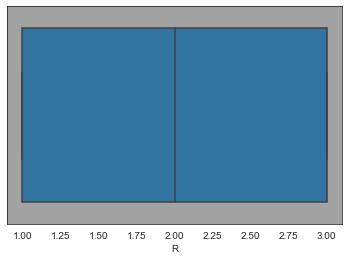

In [364]:
sns.boxplot(x=df_rfm2['R'])  

<AxesSubplot:xlabel='F'>

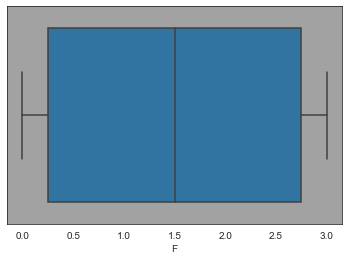

In [365]:
sns.boxplot(x=df_rfm2['F'])  

<AxesSubplot:xlabel='M'>

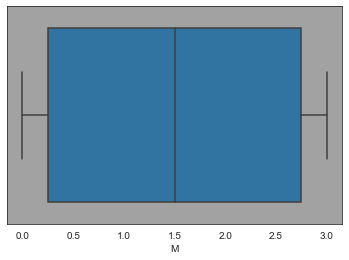

In [366]:
sns.boxplot(x=df_rfm2['M'])  

In [329]:
df_rfm3 =df_rfm2.copy()

In [330]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [331]:
df_rfm3.iloc[:,0:-1] = scaler.fit_transform(df_rfm3.iloc[:,0:-1].to_numpy())
print(df_rfm3)

             Recency  Frequency  Monetary         R         F         M  \
CustomerID                                                                
12346       2.334574  -0.425097  8.358668 -1.226527 -1.341393  1.341393   
12347      -0.905340   0.354417  0.250966  1.215830  1.341393  1.341393   
12348      -0.175360  -0.035340 -0.028596 -0.005349  0.447131  1.341393   
12349      -0.735345  -0.425097 -0.033012  1.215830 -1.341393  1.341393   
12350       2.174578  -0.425097 -0.191347 -1.226527 -1.341393 -0.447131   
...              ...        ...       ...       ...       ...       ...   
18280       1.854587  -0.425097 -0.208459 -1.226527 -0.447131 -1.341393   
18281       0.884612  -0.425097 -0.219560 -1.226527 -0.447131 -1.341393   
18282      -0.845342  -0.295178 -0.208742  1.215830  0.447131 -1.341393   
18283      -0.885341   1.523687  0.004519  1.215830  1.341393  1.341393   
18287      -0.495351  -0.165259 -0.024141 -0.005349  0.447131  1.341393   

            RFM_Segment 

<AxesSubplot:xlabel='Recency'>

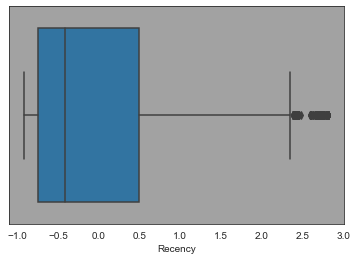

In [332]:
sns.boxplot(x=df_rfm3['Recency'])  

#### If we look at the above scenarios it's clear if we use the data as is or even after applying standard scalar we do see
#### outliers. But if we look at the R F M values, these are derived from the invoice date, unit price, quantity, based
#### on customerid and invoice date, we figured frequency. From these we did derive R F M, these values don't have out liers.
#### I believe we can try these as derived values and use them for clustering.
#### Let's try both.

#### Let's try actual values first

In [368]:
df2_final.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  spend  year  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  15.30  2010   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  22.00  2010   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   

   month  day  InvoiceMonth  CohortMonth       CohortInvDate cohortdate  \
0     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
1     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
2     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
3     12    1            12           12 2010-12-01 08:26:00 2010-12-01   
4     12    1            12           12 2010-12-01 08:26:00 2010-12-01   

   Cohortyear  Cohortmonth  Cohortday  daydiff_1  
0        2010           12          1          1  
1        2010           12          1          1  
2        2010           12          1          1  
3        2010           12          1          1  
4        2010           12          1          1

In [369]:
df3_final = df2_final.copy()

In [371]:
df3_final = df3_final.drop(['InvoiceMonth', 'CohortMonth', 'CohortInvDate', 'cohortdate', 'Cohortyear', 'Cohortmonth', 'Cohortday', 'daydiff_1'], axis=1)

In [372]:
df3_final.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  spend  year  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  15.30  2010   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  22.00  2010   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  2010   

   month  day  
0     12    1  
1     12    1  
2     12    1  
3     12    1  
4     12    1

In [ ]:
#### Since we calculated spend as quantity * unit price, we can remove them and keep the derived column spend.

In [373]:
df3_final = df3_final.drop(['Quantity','UnitPrice'], axis=1)

In [374]:
df3_final = df3_final.drop(['Description'], axis=1)

<AxesSubplot:>

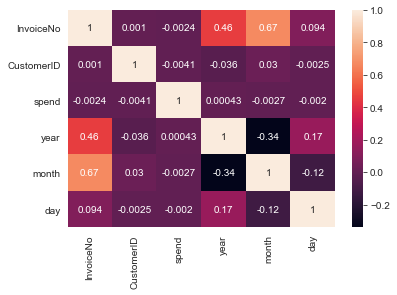

In [375]:
sns.heatmap(df3_final.corr(), annot=True)

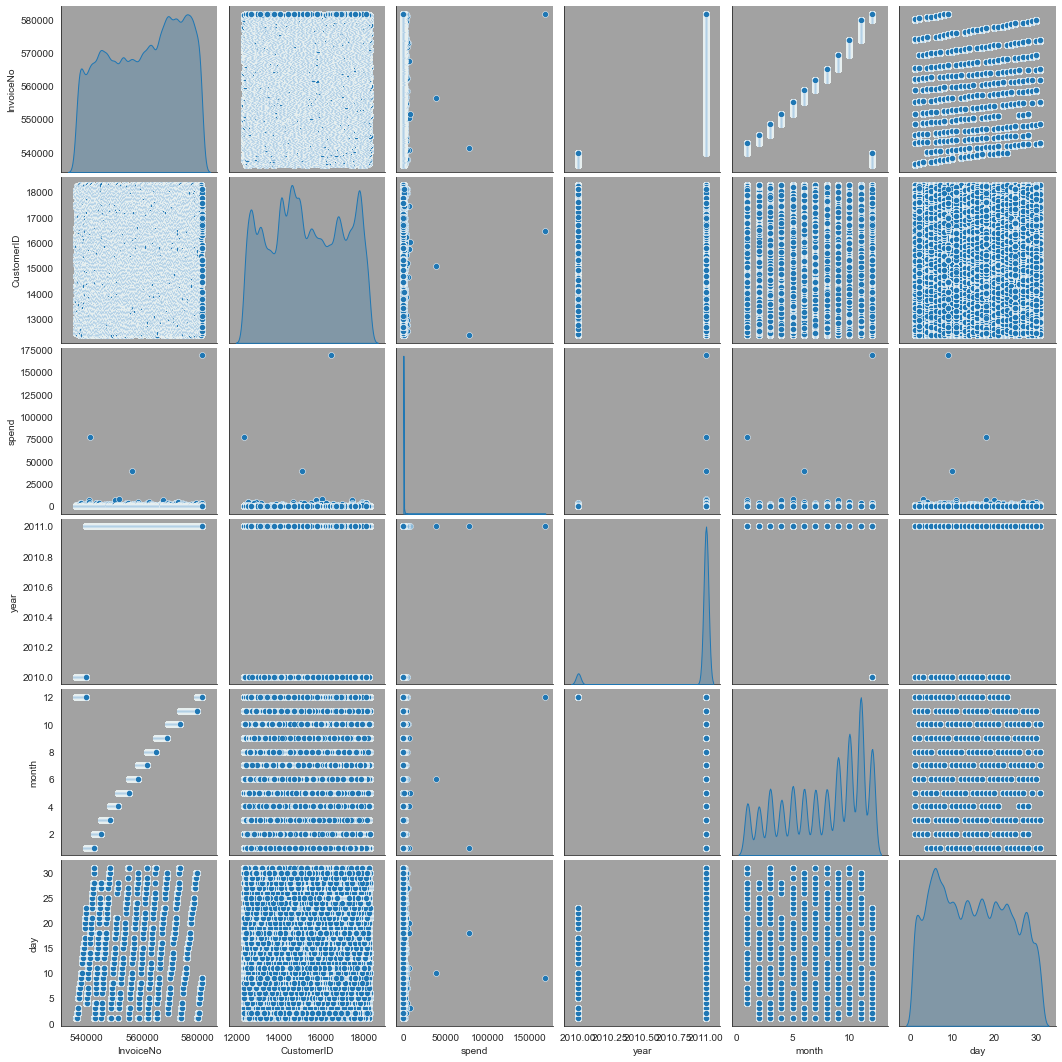

In [376]:
sns.pairplot(df3_final,diag_kind = 'kde') 

In [377]:
df3_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int64         
 1   StockCode    397884 non-null  object        
 2   InvoiceDate  397884 non-null  datetime64[ns]
 3   CustomerID   397884 non-null  int64         
 4   Country      397884 non-null  object        
 5   spend        397884 non-null  float64       
 6   year         397884 non-null  int64         
 7   month        397884 non-null  int64         
 8   day          397884 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 30.4+ MB


In [378]:
df3_final.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [385]:
df3_final.isnull().count()

InvoiceNo      397884
StockCode      397884
InvoiceDate    397884
CustomerID     397884
Country        397884
spend          397884
year           397884
month          397884
day            397884
dtype: int64

In [390]:
df3_final[(df3_final.Country == 'Unspecified')].count()

InvoiceNo      244
StockCode      244
InvoiceDate    244
CustomerID     244
Country        244
spend          244
year           244
month          244
day            244
dtype: int64

In [379]:
df3_final.StockCode.unique()

array(['85123A', 71053, '84406B', ..., '90214Z', 90089, 23843],
      dtype=object)

In [381]:
df3_final.nunique()

InvoiceNo      18532
StockCode       3665
InvoiceDate    17282
CustomerID      4338
Country           37
spend           2939
year               2
month             12
day               31
dtype: int64

#### Get dummies for country as country is a categorical object

In [382]:
y = pd.get_dummies(df3_final.Country, prefix='Country')

In [383]:
y.head()

Country_Australia  Country_Austria  Country_Bahrain  Country_Belgium  \
0                  0                0                0                0   
1                  0                0                0                0   
2                  0                0                0                0   
3                  0                0                0                0   
4                  0                0                0                0   

   Country_Brazil  Country_Canada  Country_Channel Islands  Country_Cyprus  \
0               0               0                        0               0   
1               0               0                        0               0   
2               0               0                        0               0   
3               0               0                        0               0   
4               0               0                        0               0   

   Country_Czech Republic  Country_Denmark  ...  Country_RSA  \
0                       0                0  ...            0   
1                       0                0  ...            0   
2                       0                0  ...            0   
3                       0                0  ...            0   
4                       0                0  ...            0   

   Country_Saudi Arabia  Country_Singapore  Country_Spain  Country_Sweden  \
0                     0                  0              0               0   
1                     0                  0              0               0   
2                     0                  0              0               0   
3                     0                  0              0               0   
4                     0                  0              0               0   

   Country_Switzerland  Country_USA  Country_United Arab Emirates  \
0                    0            0                             0   
1                    0            0                             0   
2                    0            0                             0   
3                    0            0                             0   
4                    0            0                             0   

   Country_United Kingdom  Country_Unspecified  
0                       1                    0  
1                       1                    0  
2                       1                    0  
3                       1                    0  
4                       1                    0  

[5 rows x 37 columns]

In [391]:
result = pd.concat([df3_final, y], axis=1)

In [393]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   InvoiceNo                     397884 non-null  int64         
 1   StockCode                     397884 non-null  object        
 2   InvoiceDate                   397884 non-null  datetime64[ns]
 3   CustomerID                    397884 non-null  int64         
 4   Country                       397884 non-null  object        
 5   spend                         397884 non-null  float64       
 6   year                          397884 non-null  int64         
 7   month                         397884 non-null  int64         
 8   day                           397884 non-null  int64         
 9   Country_Australia             397884 non-null  uint8         
 10  Country_Austria               397884 non-null  uint8         
 11  Country_Bahra

In [392]:
result.head()

InvoiceNo StockCode         InvoiceDate  CustomerID         Country  spend  \
0     536365    85123A 2010-12-01 08:26:00       17850  United Kingdom  15.30   
1     536365     71053 2010-12-01 08:26:00       17850  United Kingdom  20.34   
2     536365    84406B 2010-12-01 08:26:00       17850  United Kingdom  22.00   
3     536365    84029G 2010-12-01 08:26:00       17850  United Kingdom  20.34   
4     536365    84029E 2010-12-01 08:26:00       17850  United Kingdom  20.34   

   year  month  day  Country_Australia  ...  Country_RSA  \
0  2010     12    1                  0  ...            0   
1  2010     12    1                  0  ...            0   
2  2010     12    1                  0  ...            0   
3  2010     12    1                  0  ...            0   
4  2010     12    1                  0  ...            0   

   Country_Saudi Arabia  Country_Singapore  Country_Spain  Country_Sweden  \
0                     0                  0              0               0   
1                     0                  0              0               0   
2                     0                  0              0               0   
3                     0                  0              0               0   
4                     0                  0              0               0   

   Country_Switzerland  Country_USA  Country_United Arab Emirates  \
0                    0            0                             0   
1                    0            0                             0   
2                    0            0                             0   
3                    0            0                             0   
4                    0            0                             0   

   Country_United Kingdom  Country_Unspecified  
0                       1                    0  
1                       1                    0  
2                       1                    0  
3                       1                    0  
4                       1                    0  

[5 rows x 46 columns]

#### We are deleting invoice date and keeping individual, day, month , year, dropping stockcode as it is a string and there are
#### 3665 individual values , let's live without it as we need to create dummies out of it.
#### We delete country_unspecified as we created dummies and we can delete one of them as if it doesn't belong to others 
#### certainly it falls in this category so we don't need to specify explicitly.

In [395]:
result1 = result.drop(['StockCode', 'Country', 'InvoiceDate', 'Country_Unspecified'], axis=1)

In [396]:
result1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   InvoiceNo                     397884 non-null  int64  
 1   CustomerID                    397884 non-null  int64  
 2   spend                         397884 non-null  float64
 3   year                          397884 non-null  int64  
 4   month                         397884 non-null  int64  
 5   day                           397884 non-null  int64  
 6   Country_Australia             397884 non-null  uint8  
 7   Country_Austria               397884 non-null  uint8  
 8   Country_Bahrain               397884 non-null  uint8  
 9   Country_Belgium               397884 non-null  uint8  
 10  Country_Brazil                397884 non-null  uint8  
 11  Country_Canada                397884 non-null  uint8  
 12  Country_Channel Islands       397884 non-nul

<AxesSubplot:>

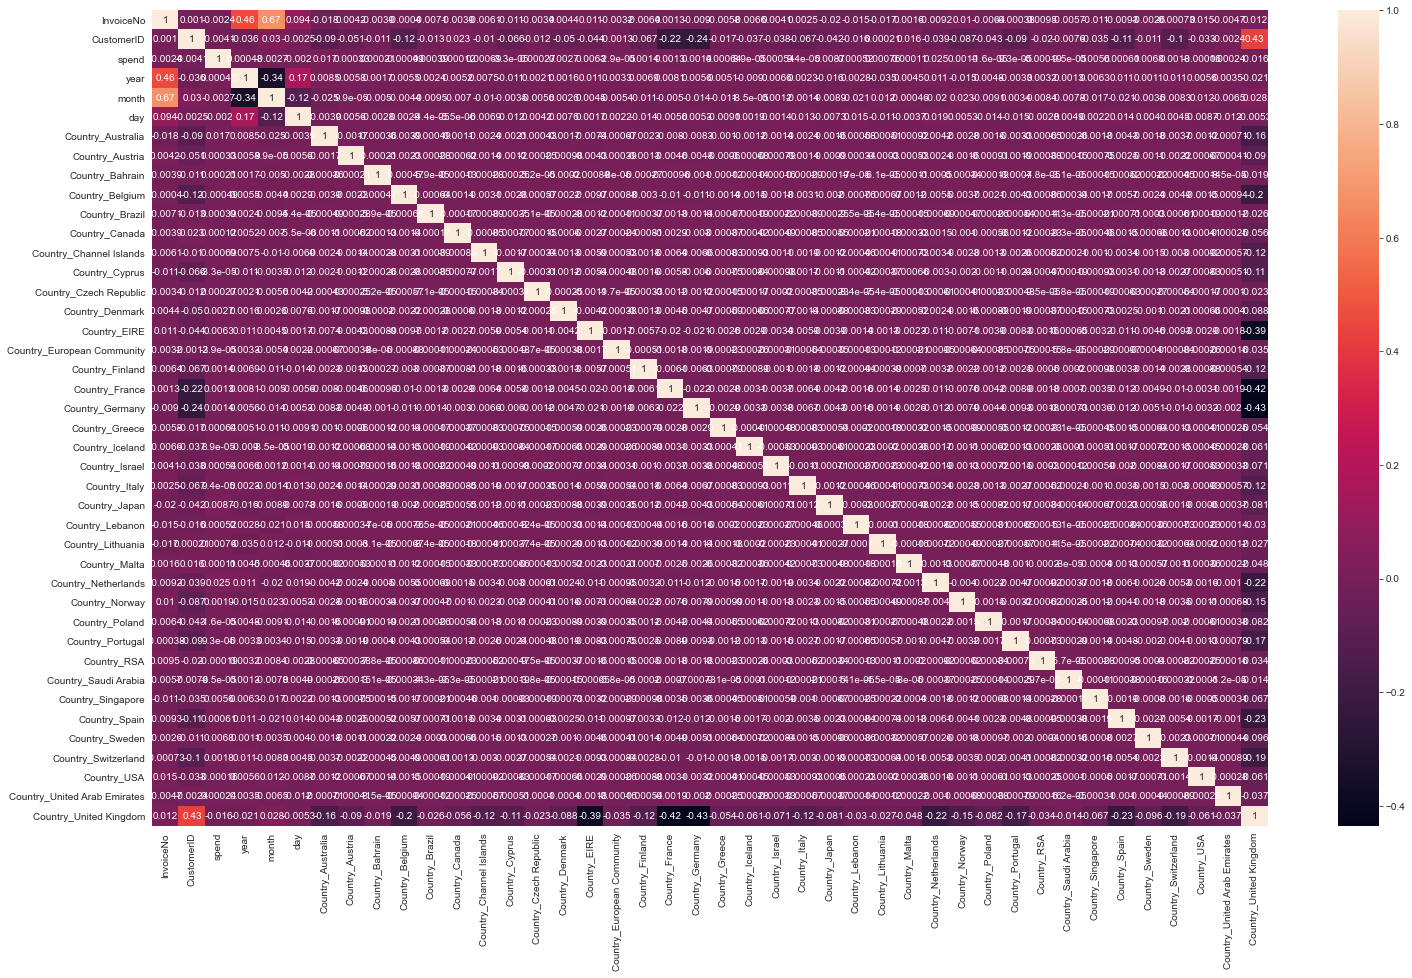

In [399]:
plt.figure(figsize = (25,15))
sns.heatmap(result1.corr(), annot=True)

In [400]:
sns.pairplot(result1,diag_kind = 'kde') 

#### We are excluding the country dummies, as we know it won't be an issue to check co-relation and outliers etc.
#### We will use them in analysis but won't use in plotting as there are too many of them.

In [402]:
result2 = result1[['InvoiceNo', 'CustomerID', 'spend', 'year', 'month', 'day']]

In [403]:
result2.head()

InvoiceNo  CustomerID  spend  year  month  day
0     536365       17850  15.30  2010     12    1
1     536365       17850  20.34  2010     12    1
2     536365       17850  22.00  2010     12    1
3     536365       17850  20.34  2010     12    1
4     536365       17850  20.34  2010     12    1

In [404]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceNo   397884 non-null  int64  
 1   CustomerID  397884 non-null  int64  
 2   spend       397884 non-null  float64
 3   year        397884 non-null  int64  
 4   month       397884 non-null  int64  
 5   day         397884 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 29.3 MB


<AxesSubplot:>

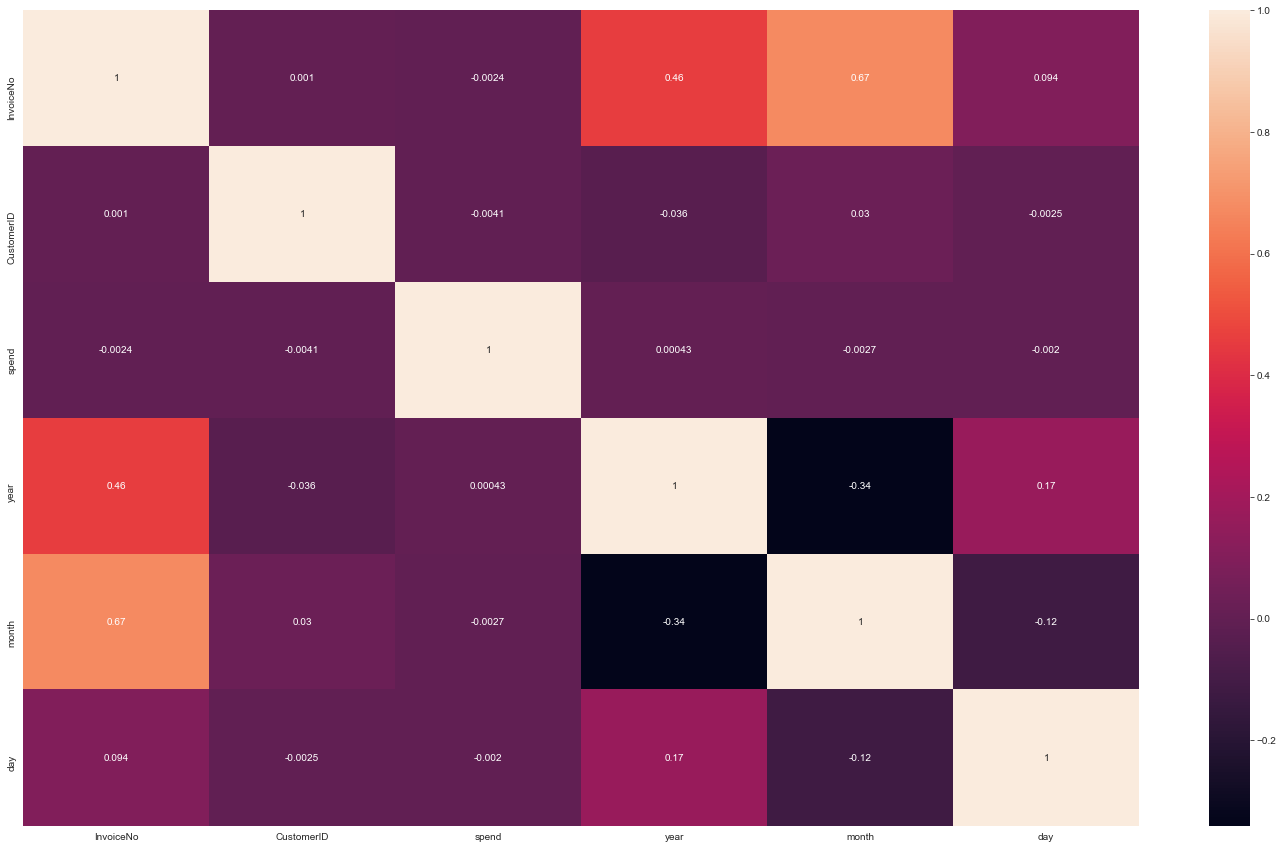

In [405]:
plt.figure(figsize = (25,15))
sns.heatmap(result2.corr(), annot=True)

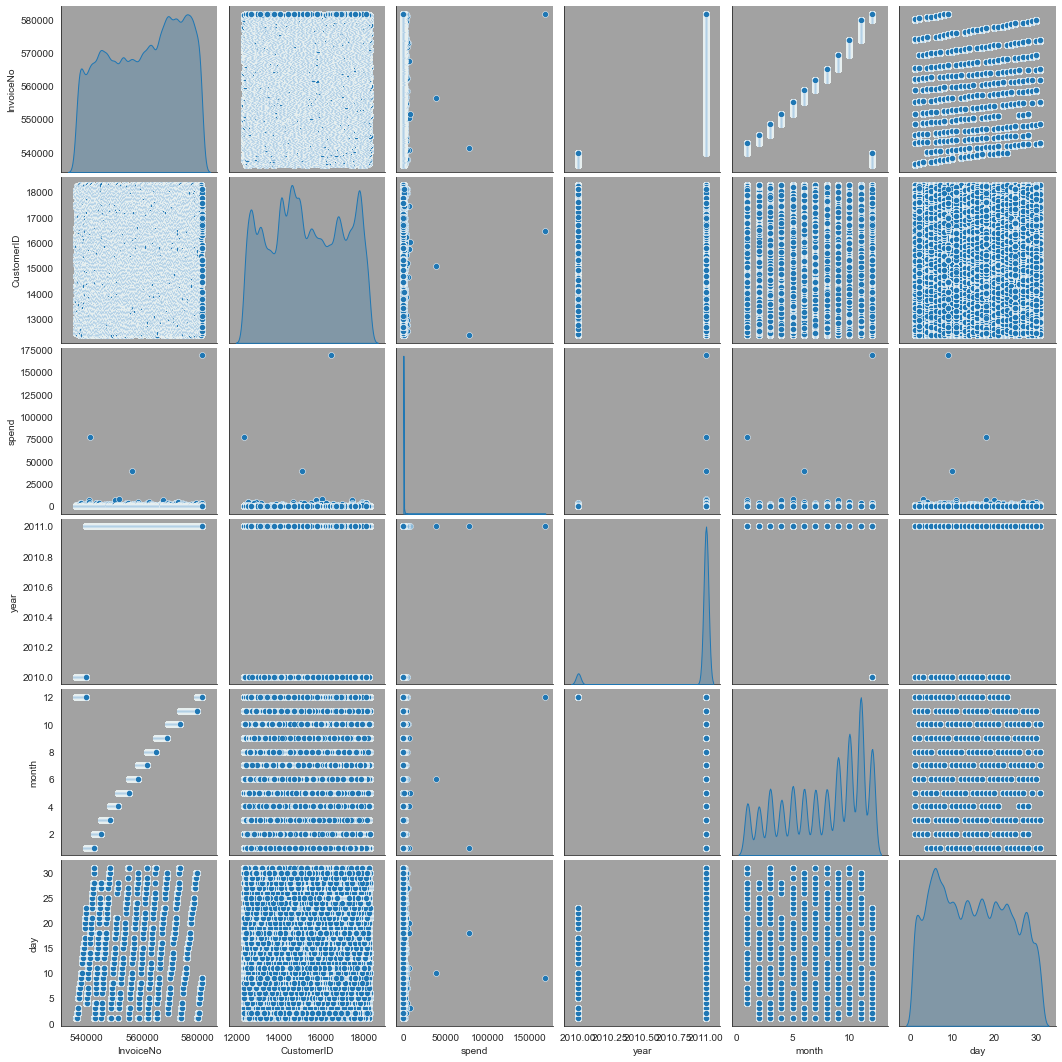

In [406]:
sns.pairplot(result2,diag_kind = 'kde') 

In [ ]:
#### We do see couple of outliers in spend.

In [407]:
result2[(result2.spend > 49000)]

InvoiceNo  CustomerID     spend  year  month  day
61619      541431       12346   77183.6  2011      1   18
540421     581483       16446  168469.6  2011     12    9

<AxesSubplot:xlabel='spend'>

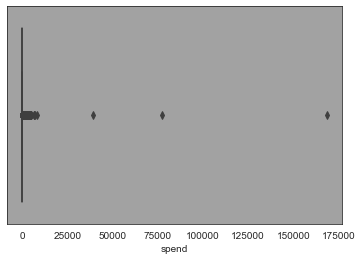

In [408]:
sns.boxplot(x=result2['spend'])  

In [409]:
result2[(result2.spend > 20000)]

InvoiceNo  CustomerID     spend  year  month  day
61619      541431       12346   77183.6  2011      1   18
222680     556444       15098   38970.0  2011      6   10
540421     581483       16446  168469.6  2011     12    9

#### Let's check the original data to see if we can delete these.

In [414]:
df2_final[((df2_final.InvoiceNo ==  541431) | (df2_final.InvoiceNo == 556444) | (df2_final.InvoiceNo == 581483))]

InvoiceNo StockCode                     Description  Quantity  \
61619      541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
222680     556444     22502  PICNIC BASKET WICKER 60 PIECES        60   
540421     581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country     spend  \
61619  2011-01-18 10:01:00       1.04       12346  United Kingdom   77183.6   
222680 2011-06-10 15:28:00     649.50       15098  United Kingdom   38970.0   
540421 2011-12-09 09:15:00       2.08       16446  United Kingdom  168469.6   

        year  month  day  InvoiceMonth  CohortMonth       CohortInvDate  \
61619   2011      1   18             1            1 2011-01-18 10:01:00   
222680  2011      6   10             6            6 2011-06-10 15:22:00   
540421  2011     12    9            12            5 2011-05-18 09:52:00   

       cohortdate  Cohortyear  Cohortmonth  Cohortday  daydiff_1  
61619  2011-01-01        2011            1          1          1  
222680 2011-06-01        2011            6          1          1  
540421 2011-12-01        2011            5          1          8

In [416]:
df2_final[(df2_final.Description == 'PICNIC BASKET WICKER 60 PIECES')]

InvoiceNo StockCode                     Description  Quantity  \
222680     556444     22502  PICNIC BASKET WICKER 60 PIECES        60   
222682     556446     22502  PICNIC BASKET WICKER 60 PIECES         1   

               InvoiceDate  UnitPrice  CustomerID         Country    spend  \
222680 2011-06-10 15:28:00      649.5       15098  United Kingdom  38970.0   
222682 2011-06-10 15:33:00      649.5       15098  United Kingdom    649.5   

        year  month  day  InvoiceMonth  CohortMonth       CohortInvDate  \
222680  2011      6   10             6            6 2011-06-10 15:22:00   
222682  2011      6   10             6            6 2011-06-10 15:22:00   

       cohortdate  Cohortyear  Cohortmonth  Cohortday  daydiff_1  
222680 2011-06-01        2011            6          1          1  
222682 2011-06-01        2011            6          1          1

#### The unit price seems to be right not a typo.

In [421]:
df2_final[(df2_final.StockCode == 22502)]

InvoiceNo StockCode                     Description  Quantity  \
249        536392     22502      PICNIC BASKET WICKER SMALL         4   
381        536401     22502      PICNIC BASKET WICKER SMALL         2   
3526       536635     22502      PICNIC BASKET WICKER SMALL         8   
3642       536638     22502      PICNIC BASKET WICKER SMALL         4   
4916       536821     22502      PICNIC BASKET WICKER SMALL         3   
5100       536842     22502      PICNIC BASKET WICKER SMALL         4   
5109       536844     22502      PICNIC BASKET WICKER SMALL        32   
5214       536846     22502      PICNIC BASKET WICKER SMALL         1   
9177       537195     22502      PICNIC BASKET WICKER SMALL         2   
12610      537389     22502      PICNIC BASKET WICKER SMALL         4   
17677      537772     22502      PICNIC BASKET WICKER SMALL         1   
19177      537844     22502      PICNIC BASKET WICKER SMALL         1   
20328      538037     22502      PICNIC BASKET WICKER SMALL         4   
21819      538146     22502      PICNIC BASKET WICKER SMALL         4   
23440      538200     22502      PICNIC BASKET WICKER SMALL         2   
23638      538207     22502      PICNIC BASKET WICKER SMALL         2   
23815      538250     22502      PICNIC BASKET WICKER SMALL         1   
25242      538361     22502      PICNIC BASKET WICKER SMALL         2   
28034      538625     22502      PICNIC BASKET WICKER SMALL         1   
28036      538625     22502      PICNIC BASKET WICKER SMALL         1   
28043      538625     22502      PICNIC BASKET WICKER SMALL         1   
28548      538641     22502      PICNIC BASKET WICKER SMALL         4   
28626      538651     22502      PICNIC BASKET WICKER SMALL         2   
29658      538811     22502      PICNIC BASKET WICKER SMALL         8   
30325      538857     22502      PICNIC BASKET WICKER SMALL         1   
32552      539088     22502      PICNIC BASKET WICKER SMALL        16   
32739      539112     22502      PICNIC BASKET WICKER SMALL         4   
32965      539213     22502      PICNIC BASKET WICKER SMALL         4   
44227      540161     22502      PICNIC BASKET WICKER SMALL         1   
44999      540247     22502      PICNIC BASKET WICKER SMALL         1   
46975      540372     22502      PICNIC BASKET WICKER SMALL         4   
48019      540458     22502      PICNIC BASKET WICKER SMALL         4   
54041      540849     22502      PICNIC BASKET WICKER SMALL         4   
56754      541113     22502      PICNIC BASKET WICKER SMALL         1   
57309      541181     22502      PICNIC BASKET WICKER SMALL        16   
59527      541292     22502      PICNIC BASKET WICKER SMALL         4   
64781      541671     22502      PICNIC BASKET WICKER SMALL         8   
66480      541797     22502      PICNIC BASKET WICKER SMALL         1   
66799      541816     22502      PICNIC BASKET WICKER SMALL         4   
67847      541847     22502      PICNIC BASKET WICKER SMALL         2   
68790      541875     22502      PICNIC BASKET WICKER SMALL         4   
69017      541932     22502      PICNIC BASKET WICKER SMALL        16   
71984      542222     22502      PICNIC BASKET WICKER SMALL        48   
72824      542268     22502      PICNIC BASKET WICKER SMALL         4   
73084      542284     22502      PICNIC BASKET WICKER SMALL         8   
73453      542349     22502      PICNIC BASKET WICKER SMALL         4   
73680      542373     22502      PICNIC BASKET WICKER SMALL        16   
74134      542401     22502      PICNIC BASKET WICKER SMALL         3   
74137      542401     22502      PICNIC BASKET WICKER SMALL         2   
74153      542406     22502      PICNIC BASKET WICKER SMALL         2   
74242      542409     22502      PICNIC BASKET WICKER SMALL         2   
74496      542429     22502      PICNIC BASKET WICKER SMALL        16   
74504      542430     22502      PICNIC BASKET WICKER SMALL        16   
74518      542431     22502      PICNIC BASKET WICKER SMALL       

In [ ]:
#### This show that the two records are different as the descrption says 60 pieces.

In [422]:
df2_final[(df2_final.Description == 'PICNIC BASKET WICKER 60 PIECES')]

InvoiceNo StockCode                     Description  Quantity  \
222680     556444     22502  PICNIC BASKET WICKER 60 PIECES        60   
222682     556446     22502  PICNIC BASKET WICKER 60 PIECES         1   

               InvoiceDate  UnitPrice  CustomerID         Country    spend  \
222680 2011-06-10 15:28:00      649.5       15098  United Kingdom  38970.0   
222682 2011-06-10 15:33:00      649.5       15098  United Kingdom    649.5   

        year  month  day  InvoiceMonth  CohortMonth       CohortInvDate  \
222680  2011      6   10             6            6 2011-06-10 15:22:00   
222682  2011      6   10             6            6 2011-06-10 15:22:00   

       cohortdate  Cohortyear  Cohortmonth  Cohortday  daydiff_1  
222680 2011-06-01        2011            6          1          1  
222682 2011-06-01        2011            6          1          1

#### Second stock code let's check

In [423]:
df2_final[(df2_final.StockCode == 23166)]

InvoiceNo StockCode                     Description  Quantity  \
61619      541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
186770     552882     23166  MEDIUM CERAMIC TOP STORAGE JAR        96   
187196     552953     23166  MEDIUM CERAMIC TOP STORAGE JAR         4   
187718     553005     23166  MEDIUM CERAMIC TOP STORAGE JAR         5   
187868     553009     23166  MEDIUM CERAMIC TOP STORAGE JAR         3   
188644     553052     23166  MEDIUM CERAMIC TOP STORAGE JAR        48   
189398     553149     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
189452     553152     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
189591     553160     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
190854     553212     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
191128     553339     23166  MEDIUM CERAMIC TOP STORAGE JAR        48   
191165     553341     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
191581     553377     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
194462     553607     23166  MEDIUM CERAMIC TOP STORAGE JAR       240   
194887     553678     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
195725     553739     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
196707     553860     23166  MEDIUM CERAMIC TOP STORAGE JAR         2   
198115     554013     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
198839     554070     23166  MEDIUM CERAMIC TOP STORAGE JAR         9   
199427     554098     23166  MEDIUM CERAMIC TOP STORAGE JAR         6   
199868     554104     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
201030     554261     23166  MEDIUM CERAMIC TOP STORAGE JAR         2   
201099     554268     23166  MEDIUM CERAMIC TOP STORAGE JAR         1   
201570     554307     23166  MEDIUM CERAMIC TOP STORAGE JAR        96   
202855     554504     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
203736     554547     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
203959     554603     23166  MEDIUM CERAMIC TOP STORAGE JAR         2   
203982     554617     23166  MEDIUM CERAMIC TOP STORAGE JAR         2   
204371     554654     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
205051     554704     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
206032     554860     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
206594     554946     23166  MEDIUM CERAMIC TOP STORAGE JAR        48   
211575     555388     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
212465     555486     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
213127     555522     23166  MEDIUM CERAMIC TOP STORAGE JAR        24   
213679     555552     23166  MEDIUM CERAMIC TOP STORAGE JAR         4   
213842     555558     23166  MEDIUM CERAMIC TOP STORAGE JAR         6   
214166     555567     23166  MEDIUM CERAMIC TOP STORAGE JAR         8   
214879     555635     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
215726     555731     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
218883     556079     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
220234     556128     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
220265     556139     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
221843     556283     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
222318     556415     23166  MEDIUM CERAMIC TOP STORAGE JAR        48   
222894     556460     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
223342     556481     23166  MEDIUM CERAMIC TOP STORAGE JAR         3   
223613     556484     23166  MEDIUM CERAMIC TOP STORAGE JAR         6   
224910     556579     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
227680     556892     23166  MEDIUM CERAMIC TOP STORAGE JAR        12   
228160     556917     23166  MEDIUM CERAMIC TOP STORAGE JAR        96   
230159     557124     23166  MEDIUM CERAMIC TOP STORAGE JAR         3   
230275     557129     23166  MEDIUM CERAMIC TOP STORAGE JAR         2   
233239     557466     23166  MEDIUM CERAMIC TOP STORAGE JAR       

In [424]:
df2_final[(df2_final.StockCode == 23843)]

InvoiceNo StockCode                  Description  Quantity  \
540421     581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country     spend  \
540421 2011-12-09 09:15:00       2.08       16446  United Kingdom  168469.6   

        year  month  day  InvoiceMonth  CohortMonth       CohortInvDate  \
540421  2011     12    9            12            5 2011-05-18 09:52:00   

       cohortdate  Cohortyear  Cohortmonth  Cohortday  daydiff_1  
540421 2011-12-01        2011            5          1          8

In [425]:
df2_final[(df2_final.Description == 'PAPER CRAFT , LITTLE BIRDIE')]

InvoiceNo StockCode                  Description  Quantity  \
540421     581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country     spend  \
540421 2011-12-09 09:15:00       2.08       16446  United Kingdom  168469.6   

        year  month  day  InvoiceMonth  CohortMonth       CohortInvDate  \
540421  2011     12    9            12            5 2011-05-18 09:52:00   

       cohortdate  Cohortyear  Cohortmonth  Cohortday  daydiff_1  
540421 2011-12-01        2011            5          1          8

#### Based on the above analysis unit price wise we don't see issues. Quantity seems to be pretty high and
#### the middle one i.e. Stockcode # 22502, one of the entires has 60, may be there was a confusion as it is 60 pieces,
#### The description says so. other than that they seem to be fine

In [426]:
df2_final[(df2_final.Quantity > 60)] 

InvoiceNo StockCode                         Description  Quantity  \
46         536371     22086     PAPER CHAIN KIT 50'S CHRISTMAS         80   
83         536376     21733    RED HANGING HEART T-LIGHT HOLDER        64   
96         536378     21212     PACK OF 72 RETROSPOT CAKE CASES       120   
102        536378    85071B  RED CHARLIE+LOLA PERSONAL DOORSIGN        96   
176        536386    85099C      JUMBO  BAG BAROQUE BLACK WHITE       100   
...           ...       ...                                 ...       ...   
541702     581566     23404          HOME SWEET HOME BLACKBOARD       144   
541703     581567     21417                   COCKLE SHELL DISH        84   
541711     581567     21326    AGED GLASS SILVER T-LIGHT HOLDER       144   
541746     581571     23167      SMALL CERAMIC TOP STORAGE JAR         96   
541867     581584     20832    RED FLOCK LOVE HEART PHOTO FRAME        72   

               InvoiceDate  UnitPrice  CustomerID         Country   spend  \
46     2010-12-01 09:00:00       2.55       13748  United Kingdom  204.00   
83     2010-12-01 09:32:00       2.55       15291  United Kingdom  163.20   
96     2010-12-01 09:37:00       0.42       14688  United Kingdom   50.40   
102    2010-12-01 09:37:00       0.38       14688  United Kingdom   36.48   
176    2010-12-01 09:57:00       1.65       16029  United Kingdom  165.00   
...                    ...        ...         ...             ...     ...   
541702 2011-12-09 11:50:00       3.26       18102  United Kingdom  469.44   
541703 2011-12-09 11:56:00       0.79       16626  United Kingdom   66.36   
541711 2011-12-09 11:56:00       0.55       16626  United Kingdom   79.20   
541746 2011-12-09 12:00:00       0.69       15311  United Kingdom   66.24   
541867 2011-12-09 12:25:00       0.72       13777  United Kingdom   51.84   

        year  month  day  InvoiceMonth  CohortMonth       CohortInvDate  \
46      2010     12    1            12            4 2010-12-01 09:00:00   
83      2010     12    1            12            1 2010-12-01 09:32:00   
96      2010     12    1            12            1 2010-12-01 09:37:00   
102     2010     12    1            12            1 2010-12-01 09:37:00   
176     2010     12    1            12            1 2010-12-01 09:57:00   
...      ...    ...  ...           ...          ...                 ...   
541702  2011     12    9            12            2 2010-12-07 16:42:00   
541703  2011     12    9            12            3 2011-03-18 12:27:00   
541711  2011     12    9            12            3 2011-03-18 12:27:00   
541746  2011     12    9            12            1 2010-12-01 09:41:00   
541867  2011     12    9            12            1 2010-12-01 16:01:00   

       cohortdate  Cohortyear  Cohortmonth  Cohortday  daydiff_1  
46     2010-12-01        2010           12          1          1  
83     2010-12-01        2010           12          1          1  
96     2010-12-01        2010           12          1          1  
102    2010-12-01        2010           12          1          1  
176    2010-12-01        2010           12          1          1  
...           ...         ...          ...        ...        ...  
541702 2011-12-01        2010           12          1         13  
541703 2011-12-01        2011            3          1         10  
541711 2011-12-01        2011            3          1         10  
541746 2011-12-01        2010           12          1         13  
541867 2011-12-01        2010           12          1         13  

[10879 rows x 20 columns]

#### Based on this we may assume quantity for the other two seems to be pretty high.
#### So we can conclude we can delete those three records.

In [428]:
result2.count()

InvoiceNo     397884
CustomerID    397884
spend         397884
year          397884
month         397884
day           397884
dtype: int64

In [430]:
result2.drop(result2[result2['spend'] > 20000].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [431]:
result2.count()

InvoiceNo     397881
CustomerID    397881
spend         397881
year          397881
month         397881
day           397881
dtype: int64

<AxesSubplot:xlabel='spend'>

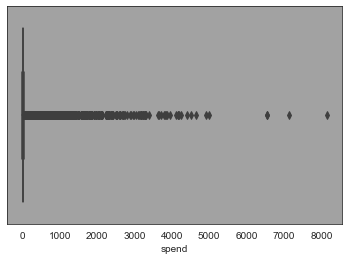

In [432]:
sns.boxplot(x=result2['spend'])  

#### This didn't help us.

In [439]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

from scipy.stats import zscore
from scipy import stats
from scipy.spatial.distance import cdist, pdist  #Pairwise distribution between data points
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster

from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

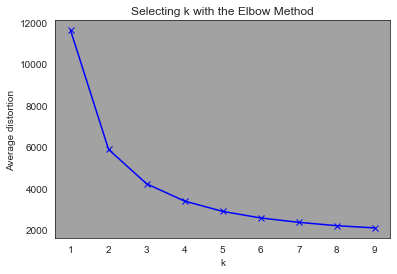

In [440]:
#Finding optimal no. of clusters

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(result2)
    prediction=model.predict(result2)
    meanDistortions.append(sum(np.min(cdist(result2, model.cluster_centers_, 'euclidean'), axis=1)) / result2.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [441]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(result2)
prediction=final_model.predict(result2)

#Append the prediction 
result2["GROUP"] = prediction
print("Groups Assigned : \n")
result2.head()

Groups Assigned : 



<ipython-input-441-2416a3994e84>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result2["GROUP"] = prediction


InvoiceNo  CustomerID  spend  year  month  day  GROUP
0     536365       17850  15.30  2010     12    1      2
1     536365       17850  20.34  2010     12    1      2
2     536365       17850  22.00  2010     12    1      2
3     536365       17850  20.34  2010     12    1      2
4     536365       17850  20.34  2010     12    1      2

array([[<AxesSubplot:title={'center':'CustomerID'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'InvoiceNo'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'day'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'month'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'spend'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'year'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

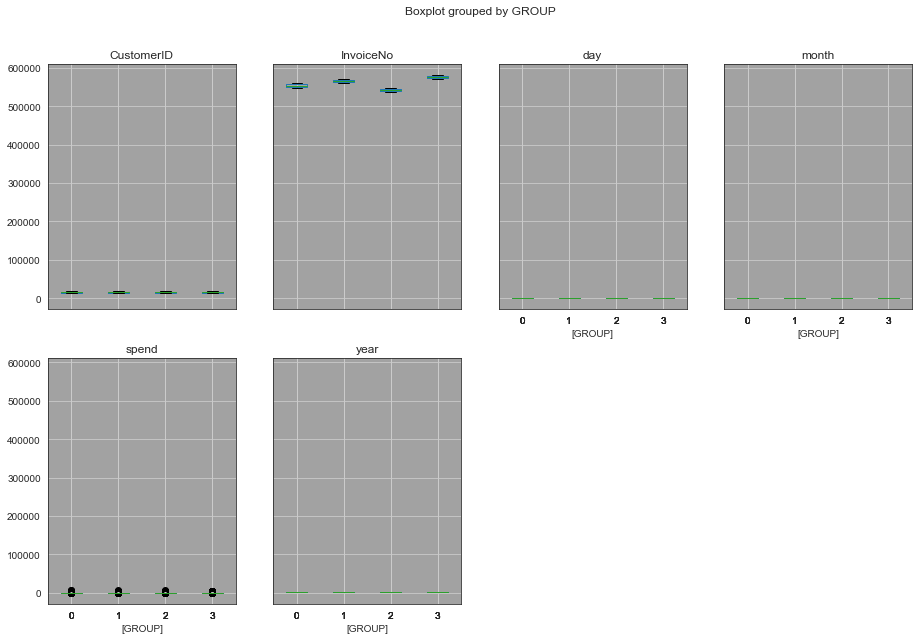

In [442]:
result2.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

<ipython-input-444-e5ccb8cc1665>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(result2.iloc[:, 0], result2.iloc[:, 1], result2.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')


Text(0.5, 0.92, 'Customer Spend')

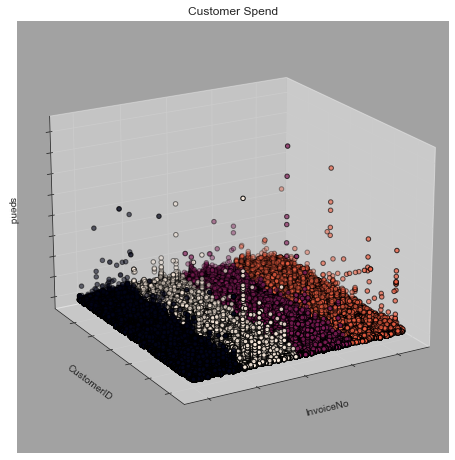

In [444]:
## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(4)
k3_model.fit(result2)
labels = k3_model.labels_
ax.scatter(result2.iloc[:, 0], result2.iloc[:, 1], result2.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('InvoiceNo')
ax.set_ylabel('CustomerID')
ax.set_zlabel('spend')
ax.set_title('Customer Spend')

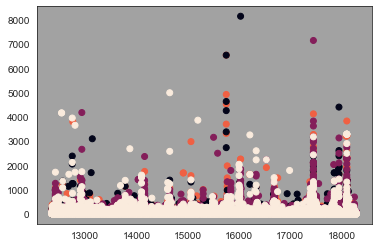

In [447]:
plt.scatter(result2['CustomerID'],result2['spend'], c=final_model.labels_ )
plt.show()

In [ ]:
#### Let's try with country column in

In [449]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(result1)
prediction=final_model.predict(result1)

#Append the prediction 
result1["GROUP"] = prediction
print("Groups Assigned : \n")
result1.head()

Groups Assigned : 



InvoiceNo  CustomerID  spend  year  month  day  Country_Australia  \
0     536365       17850  15.30  2010     12    1                  0   
1     536365       17850  20.34  2010     12    1                  0   
2     536365       17850  22.00  2010     12    1                  0   
3     536365       17850  20.34  2010     12    1                  0   
4     536365       17850  20.34  2010     12    1                  0   

   Country_Austria  Country_Bahrain  Country_Belgium  ...  Country_RSA  \
0                0                0                0  ...            0   
1                0                0                0  ...            0   
2                0                0                0  ...            0   
3                0                0                0  ...            0   
4                0                0                0  ...            0   

   Country_Saudi Arabia  Country_Singapore  Country_Spain  Country_Sweden  \
0                     0                  0              0               0   
1                     0                  0              0               0   
2                     0                  0              0               0   
3                     0                  0              0               0   
4                     0                  0              0               0   

   Country_Switzerland  Country_USA  Country_United Arab Emirates  \
0                    0            0                             0   
1                    0            0                             0   
2                    0            0                             0   
3                    0            0                             0   
4                    0            0                             0   

   Country_United Kingdom  GROUP  
0                       1      1  
1                       1      1  
2                       1      1  
3                       1      1  
4                       1      1  

[5 rows x 43 columns]

array([[<AxesSubplot:title={'center':'Country_Australia'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Country_Austria'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Country_Bahrain'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Country_Belgium'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Country_Brazil'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Country_Canada'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Country_Channel Islands'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Country_Cyprus'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Country_Czech Republic'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Country_Denmark'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Country_EIRE'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Country_European Community'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Country_Finland'}, xlabel

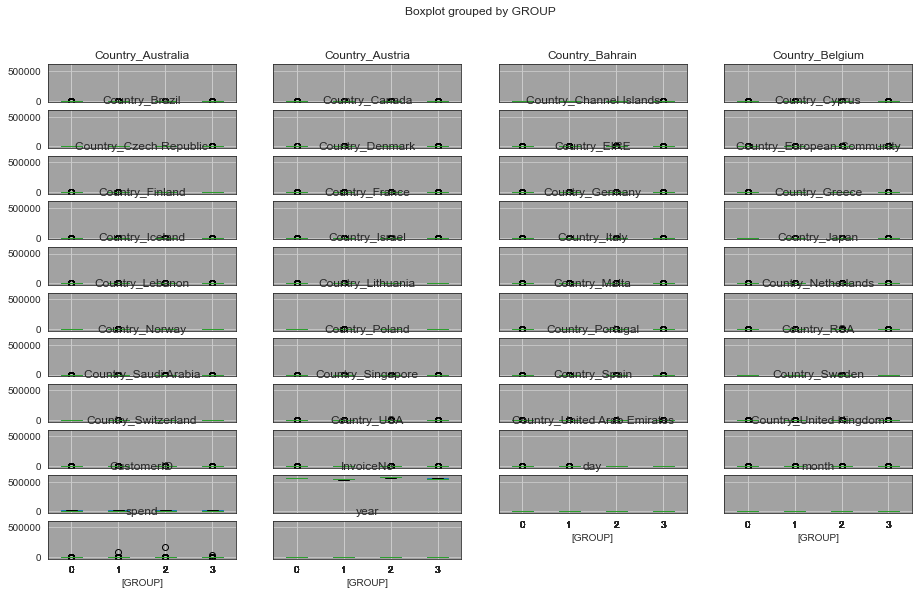

In [454]:
result1.boxplot(by='GROUP', layout = (12,4),figsize=(15,10))

#### We are taking the standard scalar applied dataframe for analysis.

In [455]:
df_rfm3.head()

Recency  Frequency  Monetary         R         F         M  \
CustomerID                                                                
12346       2.334574  -0.425097  8.358668 -1.226527 -1.341393  1.341393   
12347      -0.905340   0.354417  0.250966  1.215830  1.341393  1.341393   
12348      -0.175360  -0.035340 -0.028596 -0.005349  0.447131  1.341393   
12349      -0.735345  -0.425097 -0.033012  1.215830 -1.341393  1.341393   
12350       2.174578  -0.425097 -0.191347 -1.226527 -1.341393 -0.447131   

            RFM_Segment  RFM_Score  
CustomerID                          
12346         -1.290316          4  
12347          1.314370          9  
12348          0.068651          7  
12349          0.974628          6  
12350         -1.312965          2

In [458]:
df_rfm4 = df_rfm3[['Recency', 'Frequency', 'Monetary']]

In [459]:
df_rfm4.head()

Recency  Frequency  Monetary
CustomerID                               
12346       2.334574  -0.425097  8.358668
12347      -0.905340   0.354417  0.250966
12348      -0.175360  -0.035340 -0.028596
12349      -0.735345  -0.425097 -0.033012
12350       2.174578  -0.425097 -0.191347

In [463]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(df_rfm4)
prediction=final_model.predict(df_rfm4)

#Append the prediction 
df_rfm4["GROUP"] = prediction
print("Groups Assigned : \n")
df_rfm4.head()

Groups Assigned : 



<ipython-input-463-486e32d48eeb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm4["GROUP"] = prediction


Recency  Frequency  Monetary  GROUP
CustomerID                                      
12346       2.334574  -0.425097  8.358668      3
12347      -0.905340   0.354417  0.250966      0
12348      -0.175360  -0.035340 -0.028596      0
12349      -0.735345  -0.425097 -0.033012      0
12350       2.174578  -0.425097 -0.191347      1

array([[<AxesSubplot:title={'center':'Frequency'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Monetary'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Recency'}, xlabel='[GROUP]'>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

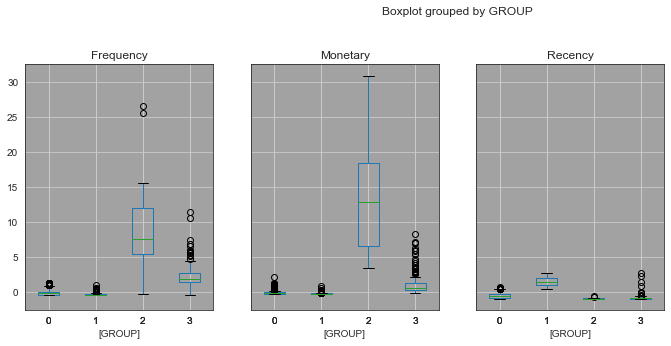

In [464]:
df_rfm4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

<ipython-input-466-2ab365353473>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(df_rfm4.iloc[:, 0], df_rfm4.iloc[:, 1], df_rfm4.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')


Text(0.5, 0.92, 'Customer Spend')

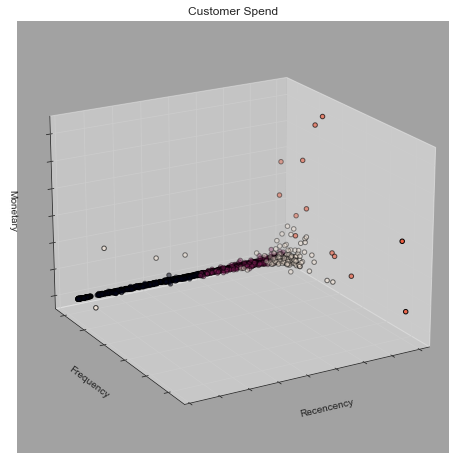

In [466]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(4)
k3_model.fit(df_rfm4)
labels = k3_model.labels_
ax.scatter(df_rfm4.iloc[:, 0], df_rfm4.iloc[:, 1], df_rfm4.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Recencency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Customer Spend')

## I feel after the modification of Recency, Frequency and Monetary to RFM based on quartile produced data without any outliers.
## This is the ideal data for clustering, even though I tried various other ways like logerthemic etc.

In [467]:
df_rfm5 = df_rfm3[['R', 'F', 'M']]

In [468]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(df_rfm5)
prediction=final_model.predict(df_rfm5)

#Append the prediction 
df_rfm5["GROUP"] = prediction
print("Groups Assigned : \n")
df_rfm5.head()

Groups Assigned : 



<ipython-input-468-60955620a472>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm5["GROUP"] = prediction


R         F         M  GROUP
CustomerID                                     
12346      -1.226527 -1.341393  1.341393      2
12347       1.215830  1.341393  1.341393      0
12348      -0.005349  0.447131  1.341393      2
12349       1.215830 -1.341393  1.341393      1
12350      -1.226527 -1.341393 -0.447131      3

array([[<AxesSubplot:title={'center':'F'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'M'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'R'}, xlabel='[GROUP]'>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

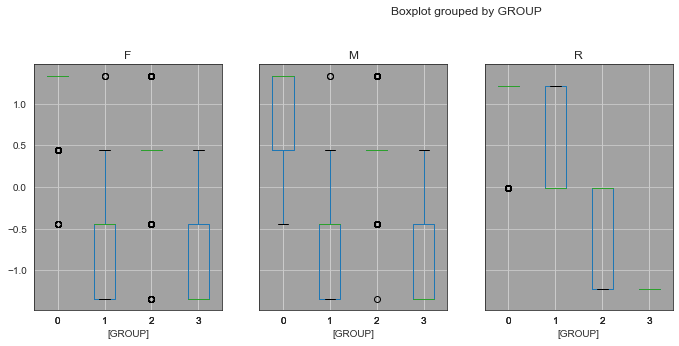

In [469]:
df_rfm5.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

<ipython-input-470-f9d9dad2ace7>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(df_rfm5.iloc[:, 0], df_rfm5.iloc[:, 1], df_rfm5.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')


Text(0.5, 0.92, 'Customer Spend')

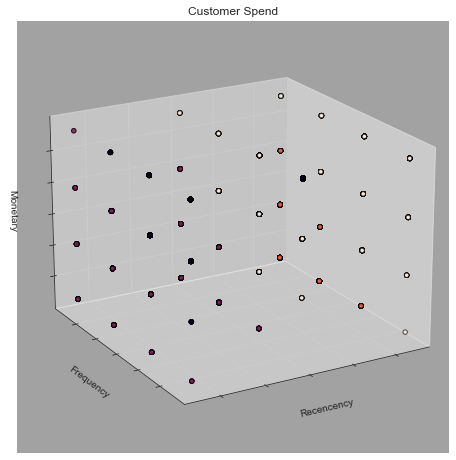

In [470]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(4)
k3_model.fit(df_rfm5)
labels = k3_model.labels_
ax.scatter(df_rfm5.iloc[:, 0], df_rfm5.iloc[:, 1], df_rfm5.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Recencency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Customer Spend')

In [472]:
m = KMeans(4)
m.fit(df_rfm5)

KMeans(n_clusters=4)

<ipython-input-476-82f099316b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm5['cl'] = m.labels_


<AxesSubplot:xlabel='R', ylabel='F'>

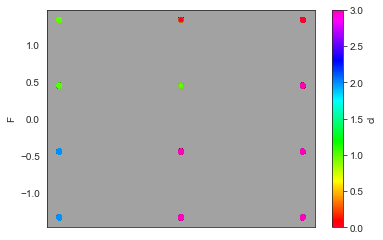

In [476]:
df_rfm5['cl'] = m.labels_
df_rfm5.plot.scatter('R', 'F', c='cl', colormap='gist_rainbow')

<ipython-input-477-f91aa2a69ec6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm5['cl'] = m.labels_


<AxesSubplot:xlabel='M', ylabel='F'>

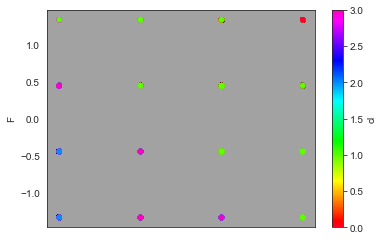

In [477]:
df_rfm5['cl'] = m.labels_
df_rfm5.plot.scatter('M', 'F', c='cl', colormap='gist_rainbow')

<ipython-input-478-785f68ed3b80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm5['cl'] = m.labels_


<AxesSubplot:xlabel='M', ylabel='R'>

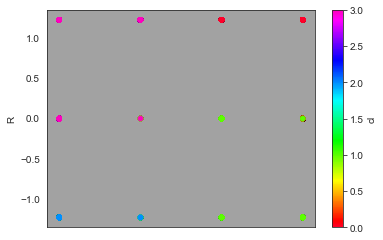

In [478]:
df_rfm5['cl'] = m.labels_
df_rfm5.plot.scatter('M', 'R', c='cl', colormap='gist_rainbow')

#### So far other than R F M, even standard scalar couldn't solve our outlier problem for Recency, Frequency and Monetary.
#### One final option I am gpoing to try logerthemic transformation, if this doesn't work
#### we will stick with the tranformation we did to Recency , Frequency, Monetary to get R F M. They don't have any outliers.

In [488]:
df_rfm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      4338 non-null   int64  
 1   Frequency    4338 non-null   int64  
 2   Monetary     4338 non-null   float64
 3   R            4338 non-null   int32  
 4   F            4338 non-null   int32  
 5   M            4338 non-null   int32  
 6   RFM_Segment  4338 non-null   object 
 7   RFM_Score    4338 non-null   int64  
dtypes: float64(1), int32(3), int64(3), object(1)
memory usage: 383.2+ KB


In [489]:
df_rfm2.describe()

Recency    Frequency       Monetary            R            F  \
count  4338.000000  4338.000000    4338.000000  4338.000000  4338.000000   
mean     92.536422     4.272015    2054.266460     2.004380     1.500000   
std     100.014169     7.697998    8989.230441     0.818976     1.118369   
min       1.000000     1.000000       3.750000     1.000000     0.000000   
25%      18.000000     1.000000     307.415000     1.000000     0.250000   
50%      51.000000     2.000000     674.485000     2.000000     1.500000   
75%     142.000000     5.000000    1661.740000     3.000000     2.750000   
max     374.000000   209.000000  280206.020000     3.000000     3.000000   

                 M    RFM_Score  
count  4338.000000  4338.000000  
mean      1.500000     5.004380  
std       1.118369     2.574816  
min       0.000000     1.000000  
25%       0.250000     3.000000  
50%       1.500000     5.000000  
75%       2.750000     7.000000  
max       3.000000     9.000000

#### We are trying logethemic on data but no luck in getting rid of outliers.

In [493]:
df_rfm_log1 = df_rfm2[['Recency','Frequency','Monetary']]

In [ ]:
df_rfm_log1

In [494]:
df_rfm_log2 = np.log2(df_rfm_log1)

In [495]:
df_rfm_log2.head()

Recency  Frequency   Monetary
CustomerID                                
12346       8.348728   0.000000  16.236007
12347       1.000000   2.807355  12.073472
12348       6.228819   2.000000  10.811567
12349       4.247928   0.000000  10.779350
12350       8.276124   0.000000   8.385431

In [496]:
df_rfm_log2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   float64
 1   Frequency  4338 non-null   float64
 2   Monetary   4338 non-null   float64
dtypes: float64(3)
memory usage: 264.6 KB


In [497]:
df_rfm_log2.describe()

Recency    Frequency     Monetary
count  4338.000000  4338.000000  4338.000000
mean      5.435402     1.362599     9.508489
std       2.066581     1.299583     1.819087
min       0.000000     0.000000     1.906891
25%       4.169925     0.000000     8.264044
50%       5.672425     1.000000     9.397643
75%       7.149747     2.321928    10.698479
max       8.546894     7.707359    18.096128

<AxesSubplot:xlabel='Recency'>

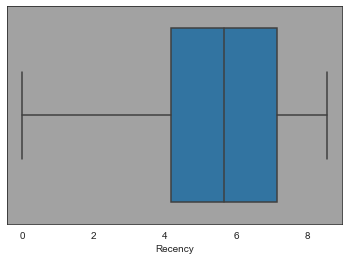

In [498]:
sns.boxplot(x=df_rfm_log2['Recency'])  

<AxesSubplot:xlabel='Frequency'>

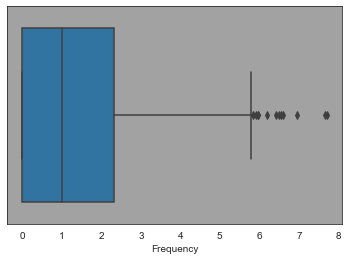

In [499]:
sns.boxplot(x=df_rfm_log2['Frequency'])  

<AxesSubplot:xlabel='Monetary'>

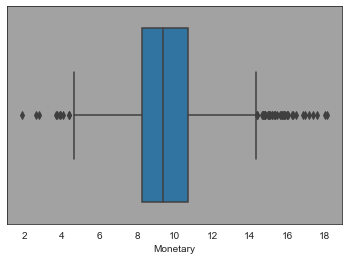

In [500]:
sns.boxplot(x=df_rfm_log2['Monetary'])  

#### So based on this I feel the R F M with 4 clusters is the best solution so far. We can try three clusters and see.

#### For tableau let's take the cleaned up data frames and save them
#### df2_final all original values
#### df_rfm forclusters.
#### df_rfm5 K means clustering

In [506]:
df2_final.to_csv('project1_df2_final_jan082022.csv')

In [507]:
df_rfm.to_csv('project1_df_rfm_jan082022.csv')

In [508]:
df_rfm5.to_csv('project1_df_rfm5_jan082022.csv')

In [510]:
df_rfm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 12346 to 18287
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       4338 non-null   float64
 1   F       4338 non-null   float64
 2   M       4338 non-null   float64
 3   GROUP   4338 non-null   int32  
 4   cl      4338 non-null   int32  
dtypes: float64(3), int32(2)
memory usage: 298.5 KB


In [511]:
df_rfm5.describe()

R             F             M        GROUP           cl
count  4.338000e+03  4.338000e+03  4.338000e+03  4338.000000  4338.000000
mean  -1.458925e-16 -2.135733e-17 -3.101868e-17     1.424389     1.456893
std    1.000115e+00  1.000115e+00  1.000115e+00     1.129366     1.144650
min   -1.226527e+00 -1.341393e+00 -1.341393e+00     0.000000     0.000000
25%   -1.226527e+00 -1.117828e+00 -1.117828e+00     0.000000     0.000000
50%   -5.348638e-03  0.000000e+00  0.000000e+00     1.000000     1.000000
75%    1.215830e+00  1.117828e+00  1.117828e+00     2.000000     3.000000
max    1.215830e+00  1.341393e+00  1.341393e+00     3.000000     3.000000

In [ ]:
#### We converted the values using standard scalar so we need to convert back to take to tableau

In [513]:
result2.describe()

InvoiceNo     CustomerID          spend           year  \
count  397881.000000  397881.000000  397881.000000  397881.000000   
mean   560616.940716   15294.428462      21.681821    2010.934259   
std     13106.088471    1713.140641      73.719532       0.247829   
min    536365.000000   12347.000000       0.001000    2010.000000   
25%    549234.000000   13969.000000       4.680000    2011.000000   
50%    561893.000000   15159.000000      11.800000    2011.000000   
75%    572090.000000   16795.000000      19.800000    2011.000000   
max    581587.000000   18287.000000    8142.750000    2011.000000   

               month            day          GROUP  
count  397881.000000  397881.000000  397881.000000  
mean        7.612485      15.042206       1.570170  
std         3.416508       8.653769       1.121142  
min         1.000000       1.000000       0.000000  
25%         5.000000       7.000000       1.000000  
50%         8.000000      15.000000       2.000000  
75%        11.000000      22.000000       3.000000  
max        12.000000      31.000000       3.000000

In [514]:
result2.to_csv('project1_result2_jan082022.csv')

#### Please see tableau workbook below....
#### https://public.tableau.com/app/profile/subbu.ba/viz/CapStoneProject1_Jan102022/Dashboard1?publish=yes


#### Trying one last time to fix the outliers and see if we can create clusters on actual Recency, Frequency, Monetary values

In [515]:
df_rfm2.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
CustomerID                                                              
12346           326          1  77183.60  1  0  3         103          4
12347             2          7   4310.00  3  3  3         333          9
12348            75          4   1797.24  2  2  3         223          7
12349            19          1   1757.55  3  0  3         303          6
12350           310          1    334.40  1  0  1         101          2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

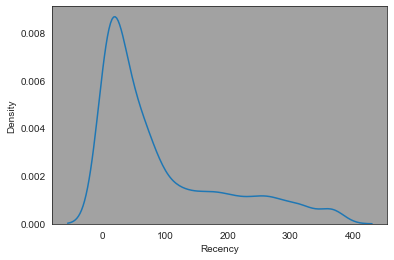

In [516]:
sns.distplot(df_rfm2.Recency, hist=False)  ## Slight ausean curve

<AxesSubplot:xlabel='Recency'>

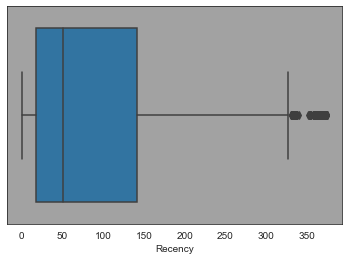

In [519]:
sns.boxplot(x=df_rfm2['Recency'])  

In [523]:
df_rfm2[(df_rfm2.Recency > 325)].Recency.unique()

array([326, 338, 367, 336, 337, 353, 358, 335, 331, 330, 372, 371, 333,
       364, 374, 366, 373, 327, 357, 360, 351, 352, 361, 365, 332, 362,
       370, 334, 355, 354, 363, 369, 340, 368, 359], dtype=int64)

#### Based on our data which is little more than a year, this is not a bad data as the data is from more than 365 days.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

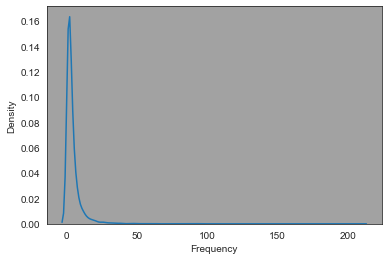

In [517]:
sns.distplot(df_rfm2.Frequency, hist=False)  

<AxesSubplot:xlabel='Frequency'>

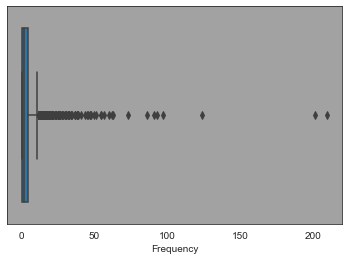

In [524]:
sns.boxplot(x=df_rfm2['Frequency'])  

In [528]:
df_rfm2[(df_rfm2.Frequency > 5)].Frequency.count()

872

In [526]:
df_rfm2[(df_rfm2.Frequency > 5)].Frequency.unique()

array([  7,   8,  10,   6,  12,  21,   9,  15,  18,  30,  11,  17,  32,
        20,  22,  31,  13,  25, 209,  14,  28,  37,  86,  24,  26,  97,
        38,  35,  19,  62,  50,  33,  57,  23,  55,  44,  16,  93,  73,
       201,  47,  48,  41,  91,  27,  63,  51,  34,  29,  46,  39, 124,
        45,  60], dtype=int64)

In [527]:
df_rfm2[(df_rfm2.Frequency > 200)]

Recency  Frequency   Monetary  R  F  M RFM_Segment  RFM_Score
CustomerID                                                               
12748             1        209   33719.73  3  3  3         333          9
14911             1        201  143825.06  3  3  3         333          9

#### This is a seizable number compared to the total records which is aroung 4K, so I am not cofortable fixing outliers in that big number

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

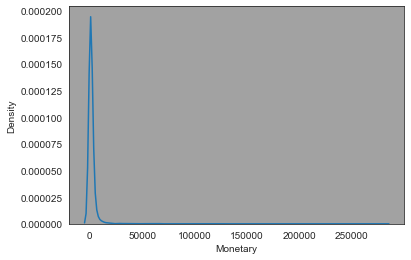

In [518]:
sns.distplot(df_rfm2.Monetary, hist=False)  

<AxesSubplot:xlabel='Monetary'>

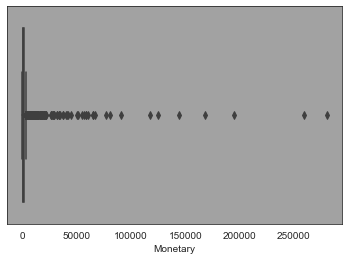

In [529]:
sns.boxplot(x=df_rfm2['Monetary'])  

In [530]:
df_rfm2[(df_rfm2.Monetary > 1000)].Monetary.count()

1668

## So I conclude that the clusters created using just R F M values above is the best solution for the customers categorization